In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import altair as alt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [54]:
df = pd.read_csv(f"../datasets/normalized/unsupervised_learning/final_player_dataset.csv")


In [55]:
# to check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           284 non-null    int64  
 1   player_name          284 non-null    object 
 2   Current Team         284 non-null    object 
 3   overall_ratings      284 non-null    float64
 4   avg_rating_10_games  284 non-null    float64
 5   goals_per_90min      284 non-null    float64
 6   yels                 284 non-null    float64
 7   reds                 284 non-null    float64
 8   shoots_per_game      284 non-null    float64
 9   pass_success         284 non-null    float64
 10  tackles              284 non-null    float64
 11  fouls                284 non-null    float64
 12  offsides_won         284 non-null    float64
 13  clear                284 non-null    float64
 14  drb                  284 non-null    float64
 15  blocks               284 non-null    flo

<Axes: >

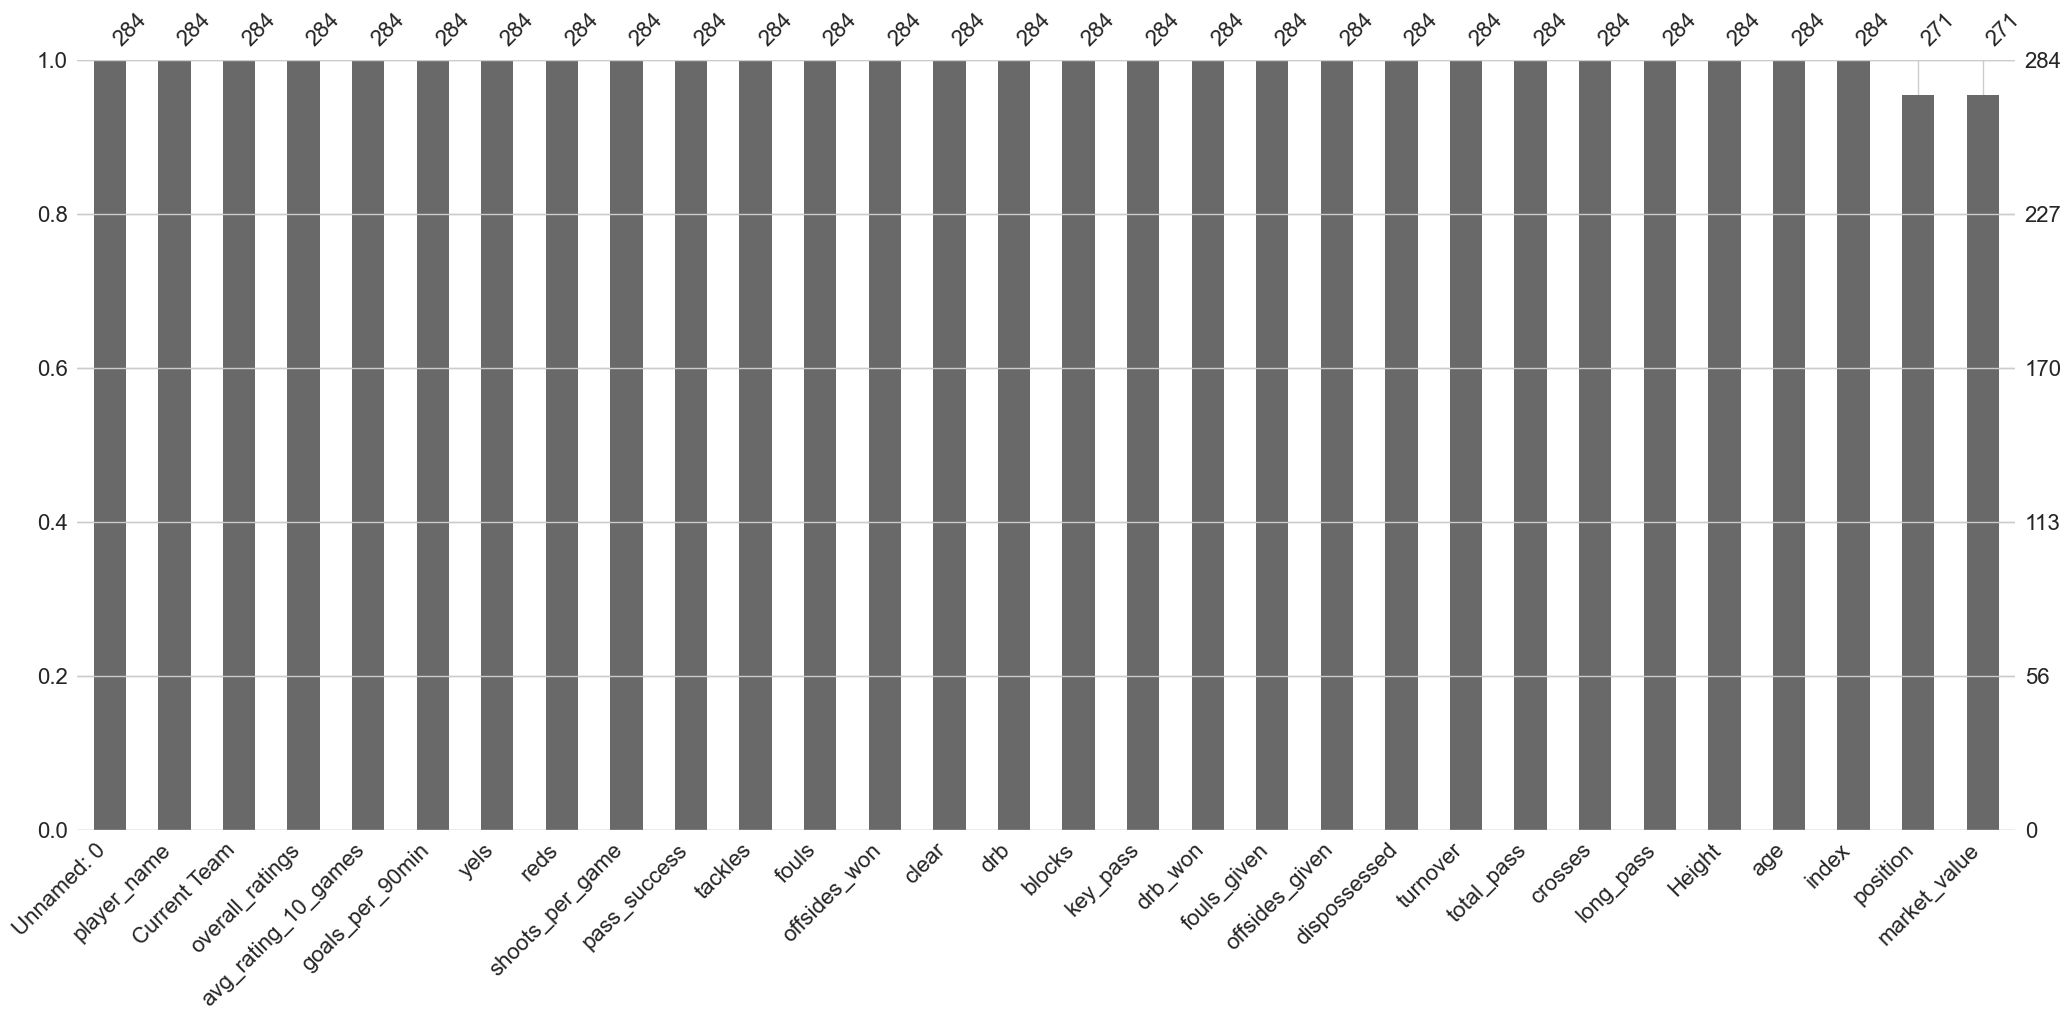

In [56]:
msno.bar(df)

In [7]:
# feature selection

features = ['overall_ratings',
 'avg_rating_10_games',
 'goals_per_90min',
 'yels',
 'reds',
 'shoots_per_game',
 'pass_success',
 'tackles',
 'fouls',
 'offsides_won',
 'clear',
 'drb',
 'blocks',
 'key_pass',
 'drb_won',
 'fouls_given',
 'offsides_given',
 'dispossessed',
 'turnover',
 'total_pass',
 'crosses',
 'long_pass']

In [57]:
features

['overall_ratings',
 'avg_rating_10_games',
 'goals_per_90min',
 'yels',
 'reds',
 'shoots_per_game',
 'pass_success',
 'tackles',
 'fouls',
 'offsides_won',
 'clear',
 'drb',
 'blocks',
 'key_pass',
 'drb_won',
 'fouls_given',
 'offsides_given',
 'dispossessed',
 'turnover',
 'total_pass',
 'crosses',
 'long_pass']

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           284 non-null    int64  
 1   player_name          284 non-null    object 
 2   Current Team         284 non-null    object 
 3   overall_ratings      284 non-null    float64
 4   avg_rating_10_games  284 non-null    float64
 5   goals_per_90min      284 non-null    float64
 6   yels                 284 non-null    float64
 7   reds                 284 non-null    float64
 8   shoots_per_game      284 non-null    float64
 9   pass_success         284 non-null    float64
 10  tackles              284 non-null    float64
 11  fouls                284 non-null    float64
 12  offsides_won         284 non-null    float64
 13  clear                284 non-null    float64
 14  drb                  284 non-null    float64
 15  blocks               284 non-null    flo

In [59]:
# standard scaler
from sklearn.preprocessing import StandardScaler

X = np.array(df[features])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-0.90864068, -1.11238778, -0.84751973, ..., -0.19618721,
        -0.17695456, -0.37245871],
       [-0.2580247 , -0.25778787, -0.84751973, ..., -0.28182045,
        -0.6926118 ,  2.04232581],
       [-0.1224797 ,  0.19882147,  0.03878458, ...,  0.18304572,
        -0.60666893, -0.54772532],
       ...,
       [-1.11195818, -0.5539669 , -0.26087743, ..., -0.17783723,
        -0.30586887, -0.25561429],
       [ 0.14861029,  0.31914421, -0.84751973, ..., -0.06773735,
         1.37001716, -0.72299194],
       [-0.56977819, -0.98280946, -0.84751973, ..., -0.36745369,
        -0.6926118 ,  1.16599272]])

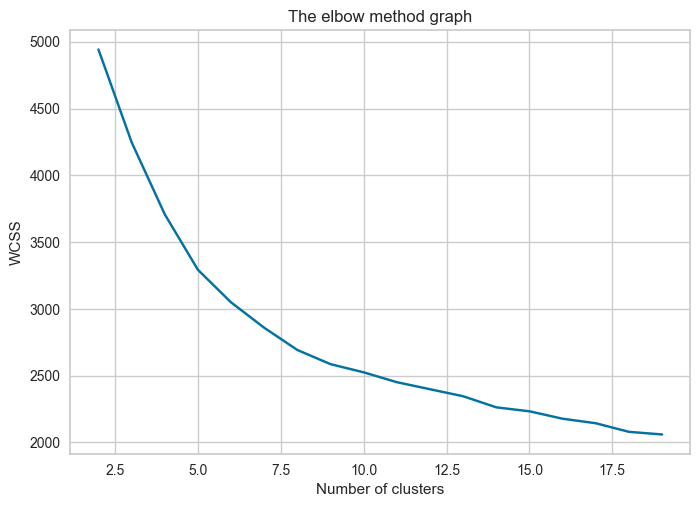

In [60]:

# find out the optimal number of clusters by within-cluster-sum of squared errors
wcss = []

for i in range(2,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)

# plt.style.use("fivethirtyeight") 
plt.plot(range(2,20), wcss)
plt.title(f'The elbow method graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# It looks like having 5 is reasonable but it is to small regarding our purpose of finding a similar player.

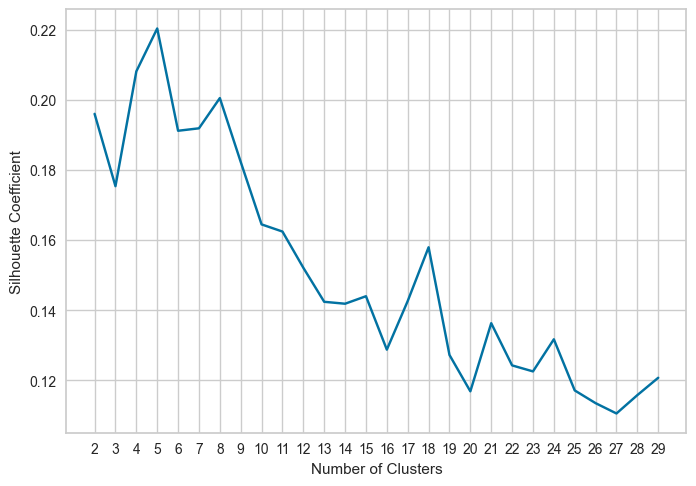

In [61]:
# To get silhouette_score
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X)
    score = silhouette_score(scaled_X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
# plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

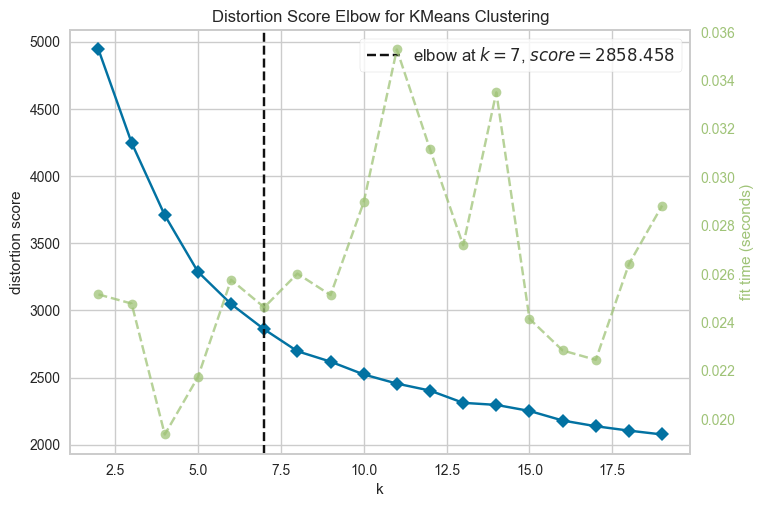

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20), timings=True)
visualizer.fit(scaled_X)
visualizer.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

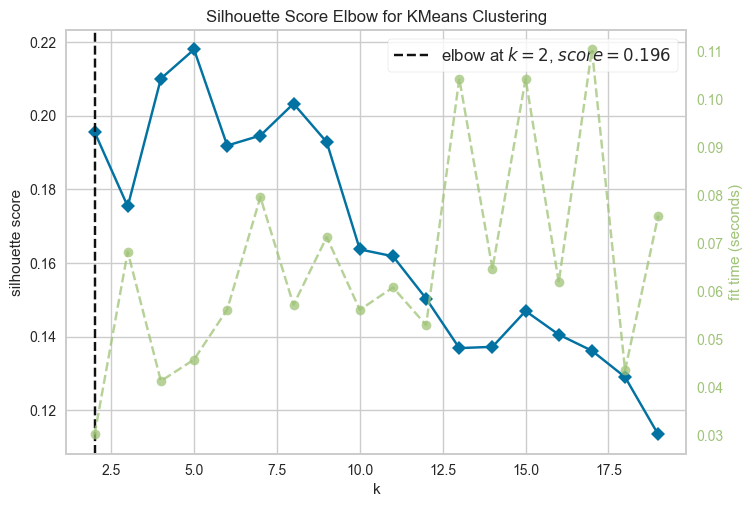

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [63]:
visualizer = KElbowVisualizer(kmeans, k=(2,20), metric='silhouette', timing=True)
visualizer.fit(scaled_X)
visualizer.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

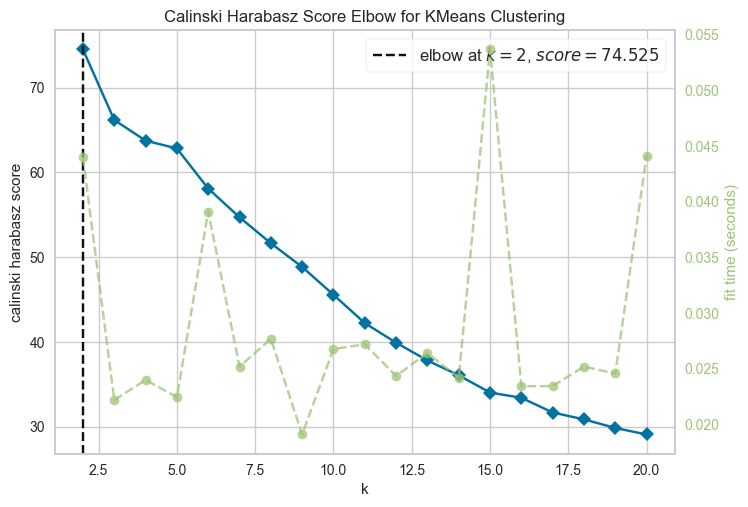

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [64]:
visualizer = KElbowVisualizer(kmeans, k=(20), metric='calinski_harabasz', timing=True)
visualizer.fit(scaled_X)
visualizer.show()

In [ ]:
# will choose 8

In [65]:
### visualize silhouette score
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

 
    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters=n_cluster, **kmeans_kwargs)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

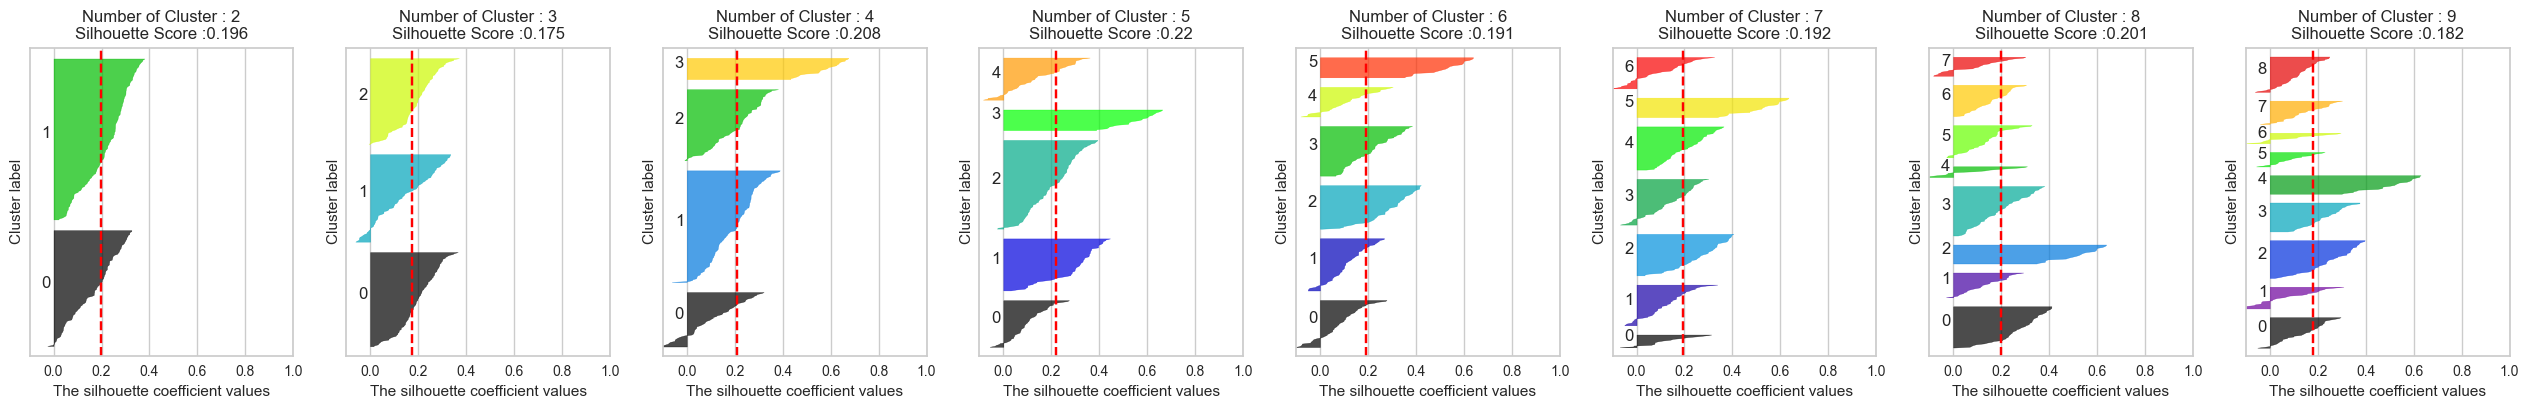

In [66]:
visualize_silhouette(range(2,10), scaled_X)

In [67]:
# except 5, 8 is the best one.
OPTIMAL_N_CLUSTERS = 8
kmeans = KMeans(n_clusters=OPTIMAL_N_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=42)

df['cluster'] = kmeans.fit_predict(scaled_X)

In [68]:
print(df['cluster'].value_counts())

cluster
3    61
0    51
5    40
6    39
1    31
2    24
7    24
4    14
Name: count, dtype: int64


In [69]:
# To evaluate, we convert the unsupervised clustering problem into a One-vs-all supervised classification problem.
for i in range(OPTIMAL_N_CLUSTERS):
    mapper = {c: 1 if i == c else 0 for c in range(OPTIMAL_N_CLUSTERS)}
    df[f'cluster {i}'] = df['cluster'].map(mapper)
df

Unnamed: 0         player_name Current Team  overall_ratings   
0             0        Aaron Hickey    Brentford         6.450000  \
1             1      Aaron Ramsdale      Arsenal         6.610000   
2             2  Abdoulaye Doucouré      Everton         6.643333   
3             3        Adam Forshaw        Leeds         6.260000   
4             4          Adam Smith  Bournemouth         6.320000   
..          ...                 ...          ...              ...   
279         279         Yoane Wissa    Brentford         6.515000   
280         280     Youri Tielemans    Leicester         6.920000   
281         281               Zanka    Brentford         6.400000   
282         282         _lex Moreno  Aston Villa         6.710000   
283         283       _douard Mendy      Chelsea         6.533333   

     avg_rating_10_games  goals_per_90min       yels      reds   
0                  6.276         0.000000   7.000000  0.000000  \
1                  6.553         0.000000   1.000000  0.000000   
2                  6.701         0.131502   6.000000  0.333333   
3                  6.253         0.000000   2.500000  0.000000   
4                  6.371         0.000000  10.000000  0.000000   
..                   ...              ...        ...       ...   
279                6.497         0.455392   1.000000  0.000000   
280                6.518         0.161746   4.333333  0.000000   
281                6.457         0.087041   1.500000  0.000000   
282                6.740         0.000000   3.000000  0.000000   
283                6.318         0.000000   2.000000  0.000000   

     shoots_per_game  pass_success  ...  market_value  cluster  cluster 0   
0           0.400000     84.700000  ...          18.0        3          0  \
1           0.000000     56.433333  ...          38.0        2          0   
2           0.833333     81.700000  ...          12.0        5          0   
3           0.300000     83.250000  ...           1.8        3          0   
4           0.100000     75.100000  ...           1.5        3          0   
..               ...           ...  ...           ...      ...        ...   
279         1.000000     70.650000  ...          15.0        1          0   
280         1.366667     82.333333  ...          30.0        5          0   
281         0.250000     80.450000  ...           1.5        3          0   
282         0.700000     79.400000  ...          20.0        6          0   
283         0.000000     80.733333  ...          18.0        2          0   

     cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  cluster 6   
0            0          0          1          0          0          0  \
1            0          1          0          0          0          0   
2            0          0          0          0          1          0   
3            0          0          1          0          0          0   
4            0          0          1          0          0          0   
..         ...        ...        ...        ...        ...        ...   
279          1          0          0          0          0          0   
280          0          0          0          0          1          0   
281          0          0          1          0          0          0   
282          0          0          0          0          0          1   
283          0          1          0          0          0          0   

     cluster 7  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
279          0  
280          0  
281          0  
282          0  
283          0  

[284 rows x 39 columns]

In [70]:
df = df.drop("Unnamed: 0", axis=1)

In [71]:
df

player_name Current Team  overall_ratings  avg_rating_10_games   
0          Aaron Hickey    Brentford         6.450000                6.276  \
1        Aaron Ramsdale      Arsenal         6.610000                6.553   
2    Abdoulaye Doucouré      Everton         6.643333                6.701   
3          Adam Forshaw        Leeds         6.260000                6.253   
4            Adam Smith  Bournemouth         6.320000                6.371   
..                  ...          ...              ...                  ...   
279         Yoane Wissa    Brentford         6.515000                6.497   
280     Youri Tielemans    Leicester         6.920000                6.518   
281               Zanka    Brentford         6.400000                6.457   
282         _lex Moreno  Aston Villa         6.710000                6.740   
283       _douard Mendy      Chelsea         6.533333                6.318   

     goals_per_90min       yels      reds  shoots_per_game  pass_success   
0           0.000000   7.000000  0.000000         0.400000     84.700000  \
1           0.000000   1.000000  0.000000         0.000000     56.433333   
2           0.131502   6.000000  0.333333         0.833333     81.700000   
3           0.000000   2.500000  0.000000         0.300000     83.250000   
4           0.000000  10.000000  0.000000         0.100000     75.100000   
..               ...        ...       ...              ...           ...   
279         0.455392   1.000000  0.000000         1.000000     70.650000   
280         0.161746   4.333333  0.000000         1.366667     82.333333   
281         0.087041   1.500000  0.000000         0.250000     80.450000   
282         0.000000   3.000000  0.000000         0.700000     79.400000   
283         0.000000   2.000000  0.000000         0.000000     80.733333   

      tackles  ...  market_value  cluster  cluster 0  cluster 1  cluster 2   
0    1.500000  ...          18.0        3          0          0          0  \
1    0.033333  ...          38.0        2          0          0          1   
2    1.866667  ...          12.0        5          0          0          0   
3    1.650000  ...           1.8        3          0          0          0   
4    1.300000  ...           1.5        3          0          0          0   
..        ...  ...           ...      ...        ...        ...        ...   
279  0.400000  ...          15.0        1          0          1          0   
280  2.266667  ...          30.0        5          0          0          0   
281  1.100000  ...           1.5        3          0          0          0   
282  1.200000  ...          20.0        6          0          0          0   
283  0.000000  ...          18.0        2          0          0          1   

     cluster 3  cluster 4  cluster 5  cluster 6  cluster 7  
0            1          0          0          0          0  
1            0          0          0          0          0  
2            0          0          1          0          0  
3            1          0          0          0          0  
4            1          0          0          0          0  
..         ...        ...        ...        ...        ...  
279          0          0          0          0          0  
280          0          0          1          0          0  
281          1          0          0          0          0  
282          0          0          0          1          0  
283          0          0          0          0          0  

[284 rows x 38 columns]

In [72]:
# train a classifier and get feature importances
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
feature_importances = []
feature_columns = ['cluster','feature_name','feature_importance']
df_fi = pd.DataFrame(columns=feature_columns)
for i in range(OPTIMAL_N_CLUSTERS):
    clf.fit(df[features].values, df[f"cluster {i}"].values)
    
    # Index sort the most important features
    sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

    # Get the most important features names and weights
    most_important_features = np.take_along_axis(
        np.array(df.iloc[:, 2:24].columns.tolist()), 
        sorted_feature_weight_idxes, axis=0)
    most_important_weights = np.take_along_axis(
        np.array(clf.feature_importances_), 
        sorted_feature_weight_idxes, axis=0)
    

    # Show
    feature_importances.append(list(zip([i for j in range(len(most_important_weights))], most_important_features, most_important_weights)))
    df_fi_cluster = pd.DataFrame(columns=feature_columns, data=list(zip([i for j in range(len(most_important_weights))], most_important_features, most_important_weights)))
    df_fi = pd.concat([df_fi, df_fi_cluster])
    
feature_importances


[[(0, 'clear', 0.23676999586668873),
  (0, 'offsides_won', 0.21487321234076465),
  (0, 'total_pass', 0.11328310173735552),
  (0, 'turnover', 0.06691111650545942),
  (0, 'key_pass', 0.052974673758347496),
  (0, 'long_pass', 0.0527347477285208),
  (0, 'dispossessed', 0.03935405145762259),
  (0, 'shoots_per_game', 0.024995110417119947),
  (0, 'crosses', 0.022303784036508675),
  (0, 'drb', 0.02155779578571754),
  (0, 'drb_won', 0.020182059188457602),
  (0, 'tackles', 0.019689237250596382),
  (0, 'pass_success', 0.018042351870567647),
  (0, 'yels', 0.015797510812470255),
  (0, 'fouls', 0.015497608043622057),
  (0, 'overall_ratings', 0.01436250114115623),
  (0, 'goals_per_90min', 0.013574561251468893),
  (0, 'avg_rating_10_games', 0.011315188653902002),
  (0, 'blocks', 0.010308700022749662),
  (0, 'fouls_given', 0.008875905018271107),
  (0, 'offsides_given', 0.00442320773262224),
  (0, 'reds', 0.0021735793800105123)],
 [(1, 'total_pass', 0.1291979920907904),
  (1, 'offsides_given', 0.1052725

In [73]:
df_fi

cluster  feature_name  feature_importance
0        0         clear            0.236770
1        0  offsides_won            0.214873
2        0    total_pass            0.113283
3        0      turnover            0.066911
4        0      key_pass            0.052975
..     ...           ...                 ...
17       7       crosses            0.011590
18       7  pass_success            0.010639
19       7         clear            0.010637
20       7  offsides_won            0.004970
21       7          reds            0.003680

[176 rows x 3 columns]

In [74]:
# visualize feature importance
import altair as alt

alt.Chart(df_fi).mark_rect().encode(
    x='cluster:O',
    y='feature_name:N',
    color='feature_importance:Q'
).properties(
    width=800,
    height=800
).configure_axis(
    labelFontSize=20
)


alt.Chart(...)

In [75]:
final_chart = alt.vconcat()
row_chart = alt.hconcat()

for i in range(OPTIMAL_N_CLUSTERS):
    df_cluster = df_fi[df_fi['cluster'] == i]
    base = alt.Chart(df_cluster, title=f'Most important features for cluster {i}').encode(
        x='feature_importance:Q',
        y=alt.Y('feature_name:N').sort('-x'),
        text=alt.Text('feature_importance:Q', format=".3"),
        color=alt.condition(
            alt.datum.feature_importance > 0.1,
            alt.value("orange"),
            alt.value('skyblue')
        )
    )

    bar = base.mark_bar().properties(
        width=300,
        height=800,
    )

    text = base.mark_text(align='left', dx=2)

    chart = (bar + text)
    if i == 0 :
        row_chart = chart
    elif i == 4:
        final_chart = alt.vconcat(final_chart, row_chart) 
        row_chart = chart
    else :
        row_chart = alt.hconcat(row_chart, chart)

final_chart = alt.vconcat(final_chart, row_chart)
    
final_chart.configure_title(
        fontSize=24,
    ).configure_axis(
        labelFontSize=20,
        titleFontSize=24,
    ).configure_text(
        fontSize=20
    )

alt.VConcatChart(...)

In [76]:
# draw map

# to draw map, transform position to x, y location
def get_x(position):
    if type(position) != str:
        return 0
    if 'Back' in position:
        return 30
    if 'Winger' in position or 'Striker' in position:
        return 90
    if 'Defensive Midfield' in position:
        return 45
    if 'Attacking Midfield' in position:
        return 65
    if 'Forward' in position:
        return 100
    if 'Goalkeeper' in position:
        return 10
    return 40

def get_y(position):
    if type(position) != str:
        return 0
    if 'Left' in position:
        return 20
    if 'Right' in position:
        return 60
    return 40

In [77]:

df['x'] = df['position'].map(lambda x: get_x(x))
df['y'] = df['position'].map(lambda x: get_y(x))

In [88]:
from scipy.ndimage import gaussian_filter
from mplsoccer import Pitch
import matplotlib.pyplot as plt

def draw_position_dist(df, cluster: str):
    df_cluster = df[df['cluster'] == cluster]
    
    top3_features = df_fi[df_fi['cluster'] == cluster].sort_values(by=['feature_importance'], ascending=False).head(3)
    top3_feature_importance = top3_features['feature_name'].values.tolist()

    
    pitch = Pitch(pitch_color='#aabb97', line_color='white', stripe_color='#c2d59d', stripe=True, line_zorder=2,)
    fig, axs = pitch.grid(figheight=9, title_height=0.08, endnote_space=0, axis=False, title_space=0, grid_height=0.82, endnote_height=0.05)
    fig.set_facecolor('#22312b')

    bin_statistic = pitch.bin_statistic(df_cluster['x'], df_cluster['y'], statistic='count', bins=(25, 25)) 
    bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
    pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='hot', edgecolors='#22312b')
    cbar = fig.colorbar(pcm, ax=axs['pitch'], shrink=0.6)
    cbar.outline.set_edgecolor('#efefef')
    cbar.ax.yaxis.set_tick_params(color='#efefef')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

    axs['endnote'].text(0.4, 0, 'Attacking Direction', va='center', ha='center', color='#c7d5cc', fontsize=12)
    axs['endnote'].arrow(0.3, 0.6, 0.2, 0, head_width=0.2, head_length=0.025, ec='w', fc='w')
    axs['endnote'].set_xlim(0, 1)
    axs['endnote'].set_ylim(0, 1)
    axs['title'].text(0.5, 0.7, f'The position distribution for cluster {cluster}', color='#c7d5cc', va='center', ha='center', fontsize=30)
    axs['title'].text(0.5, 0.2, f'Important features: {top3_feature_importance}', color='#c7d5cc', va='center', ha='center', fontsize=20)


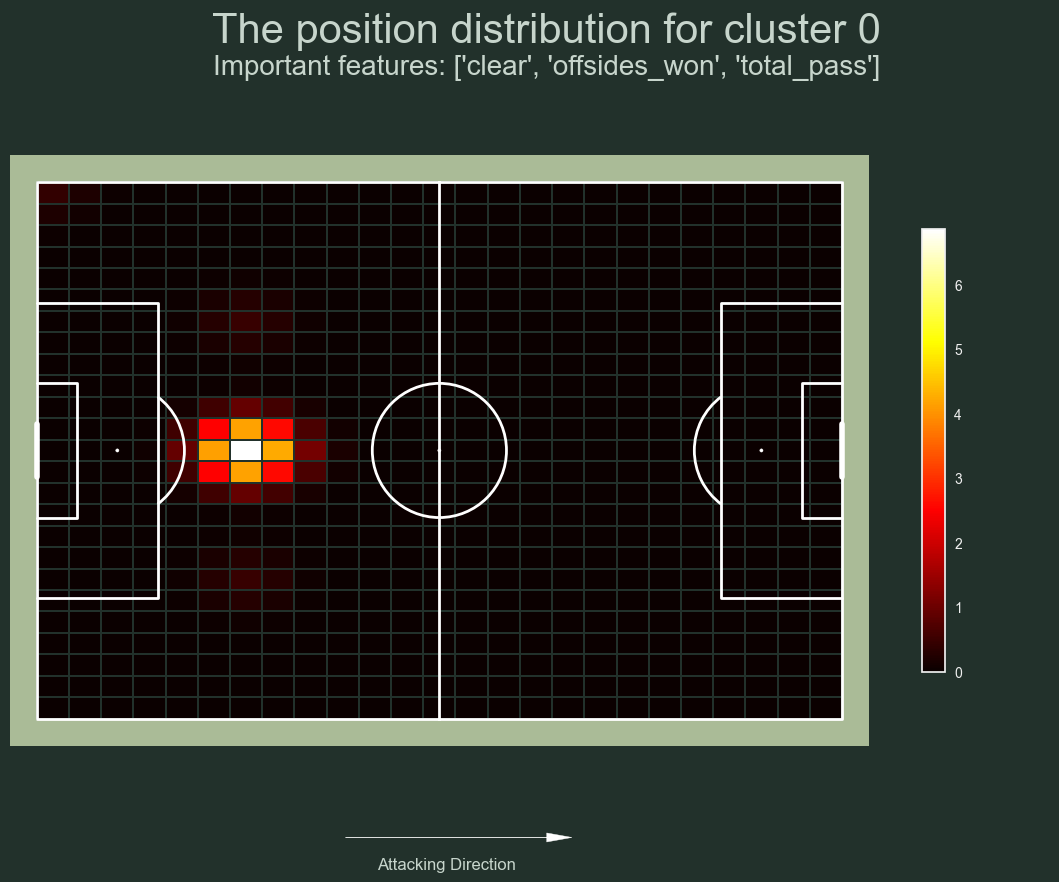

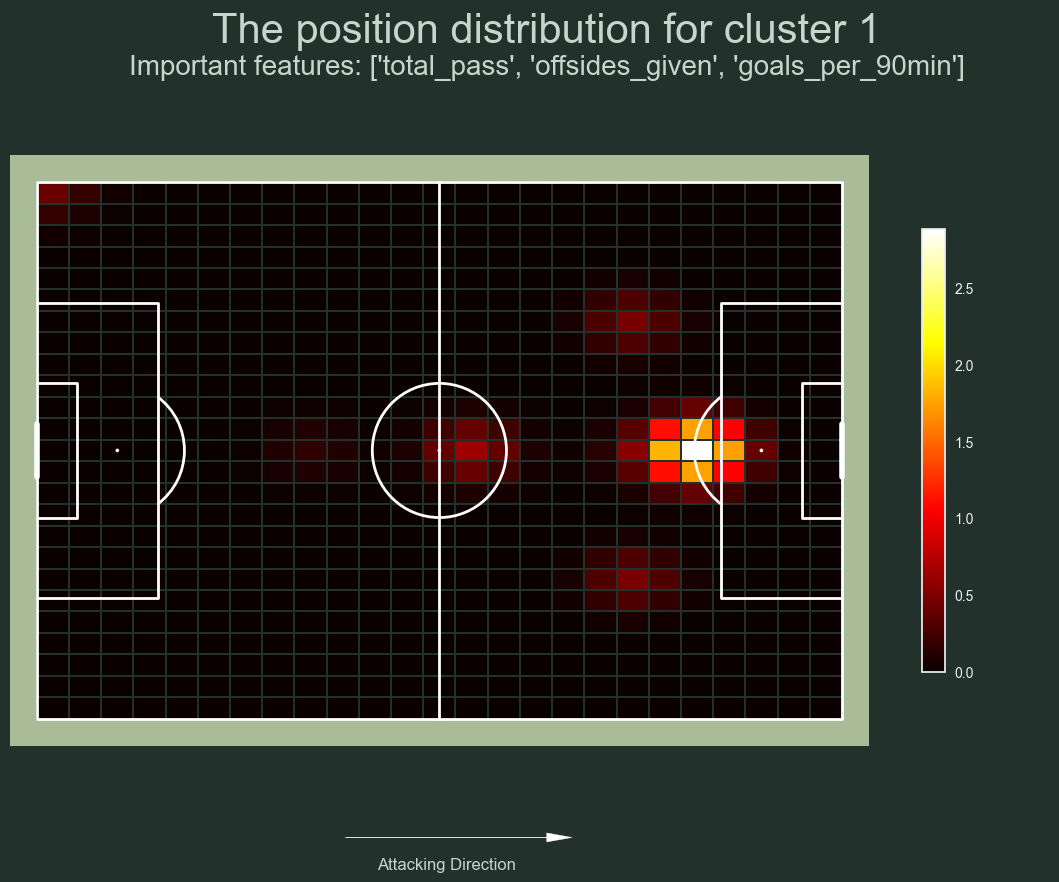

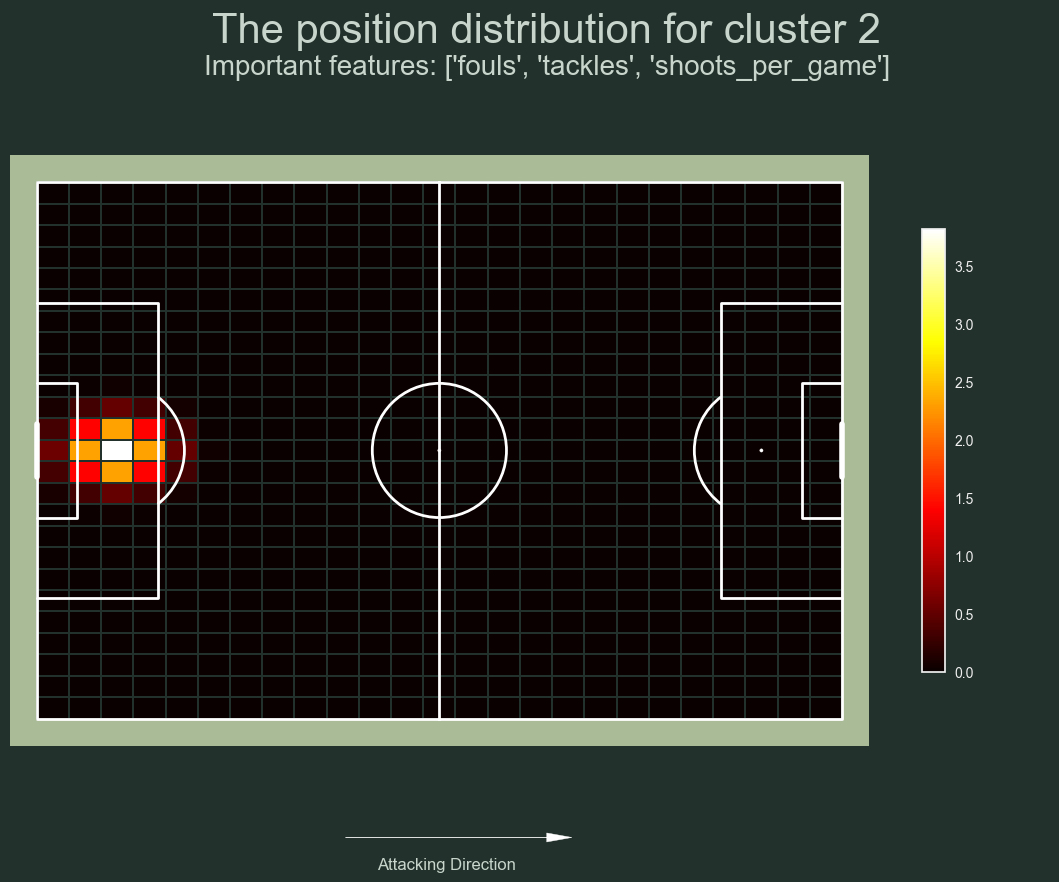

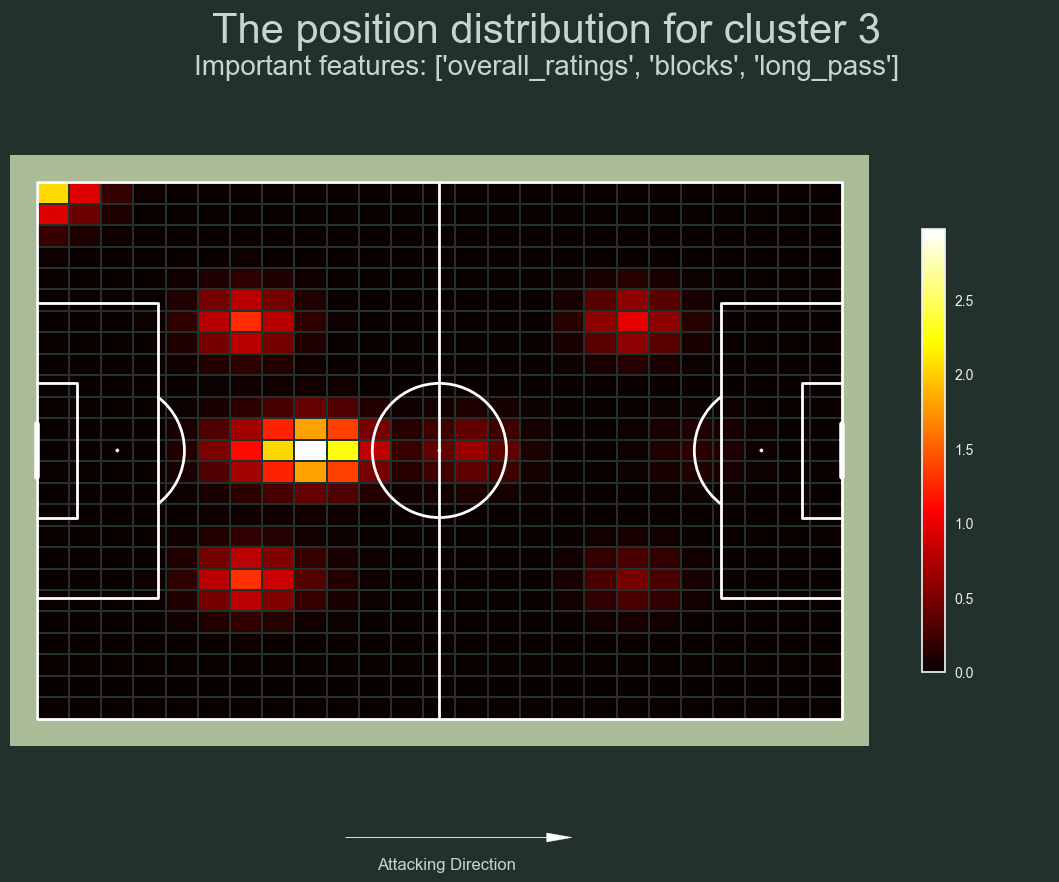

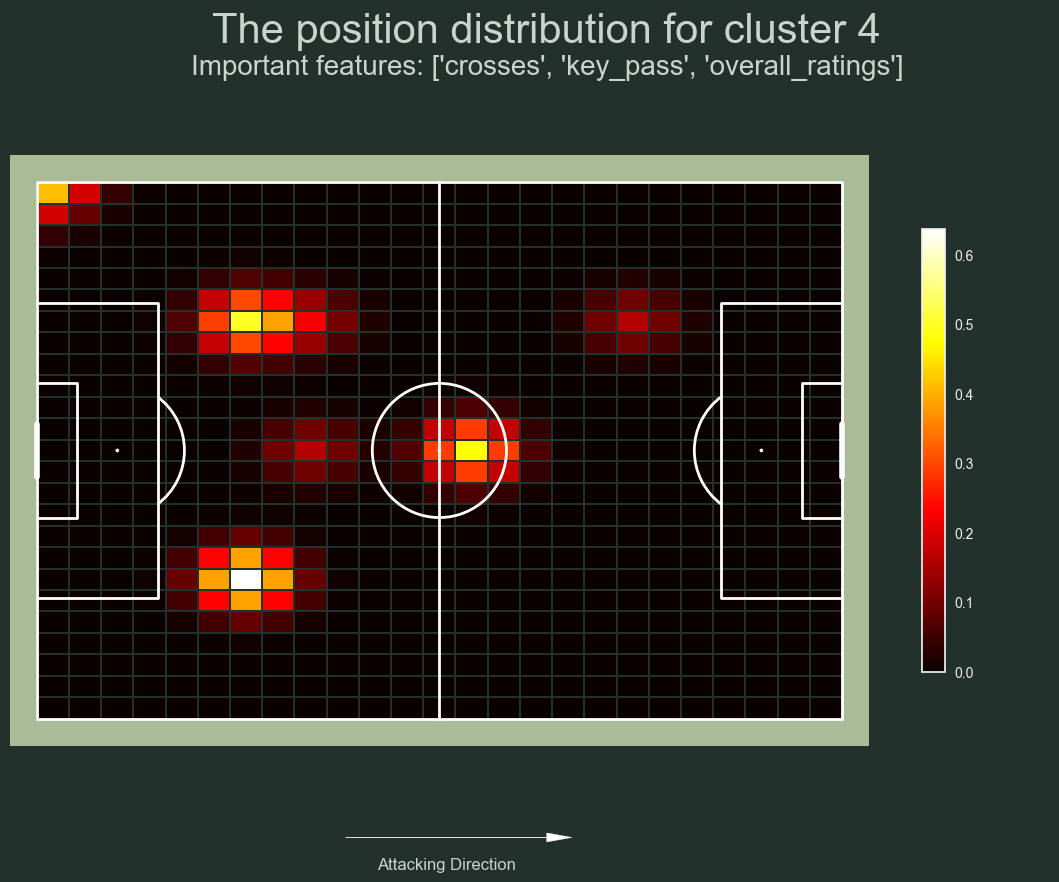

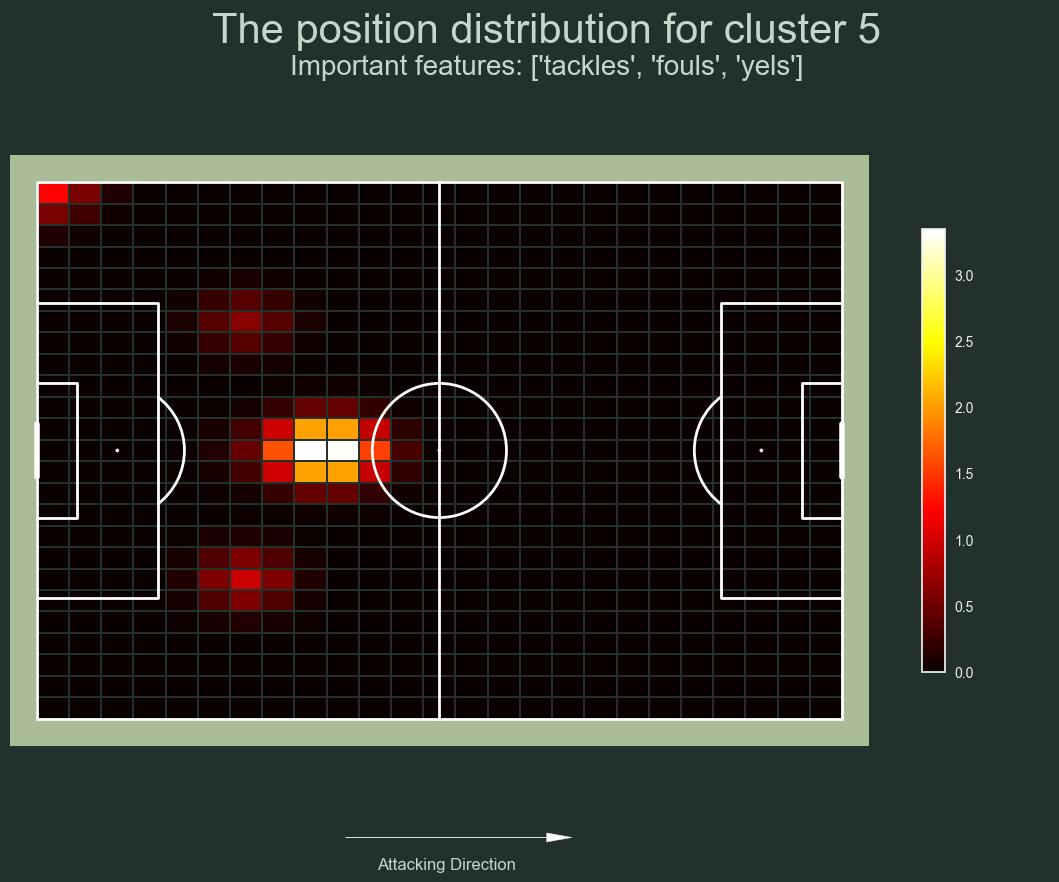

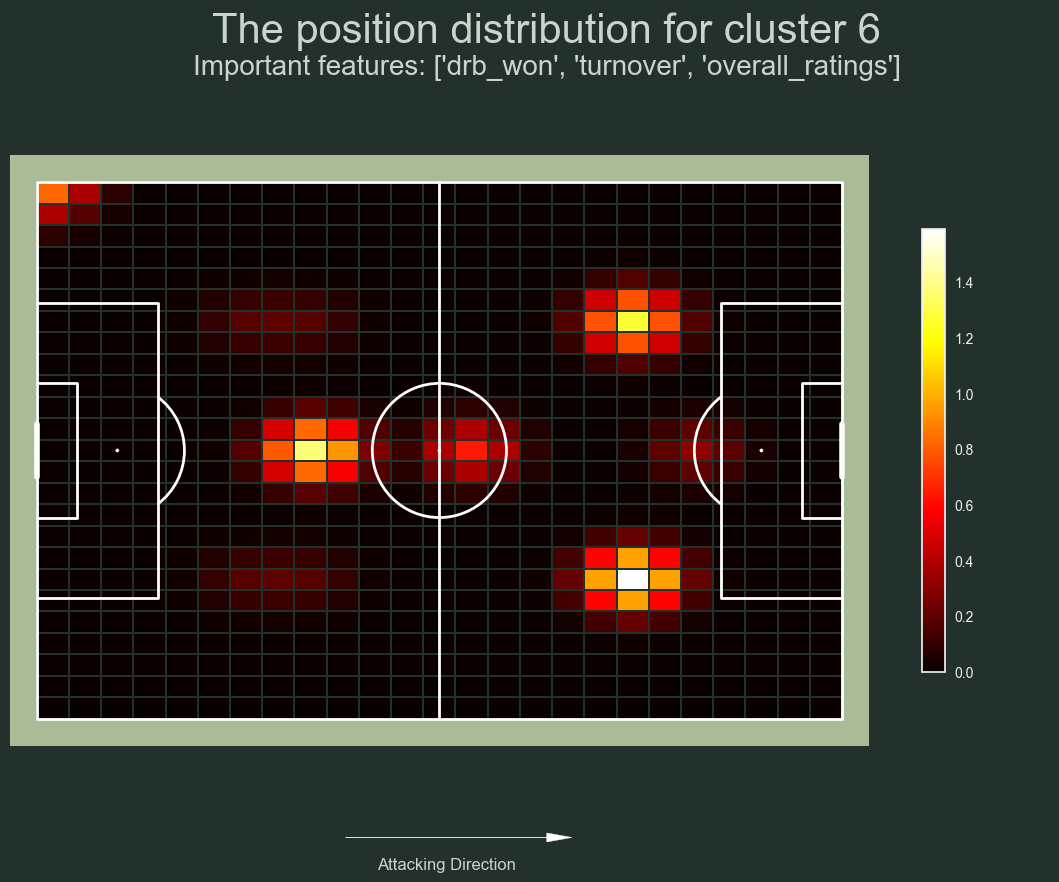

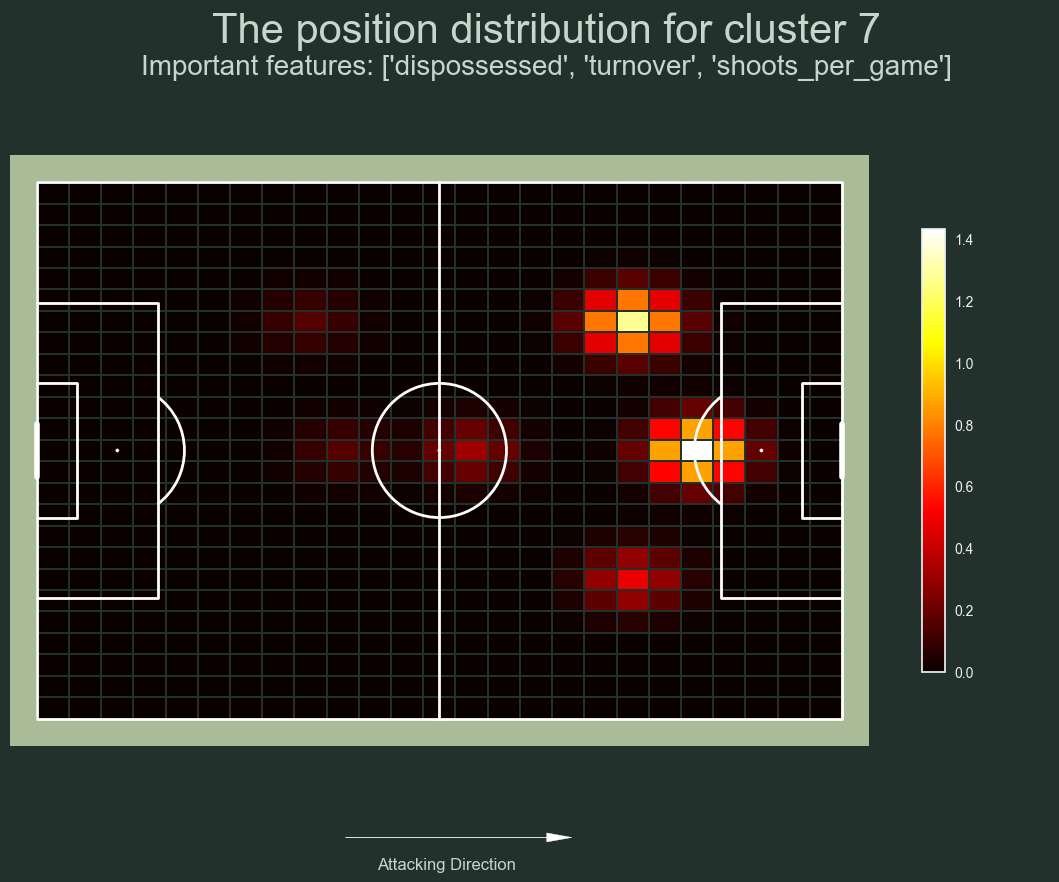

In [89]:
# from draw_football_map import draw_position_dist
for i in range(OPTIMAL_N_CLUSTERS):
    draw_position_dist(df, i)

In [35]:
# market value distribution
import altair as alt


alt.Chart(df, width=100).transform_density(
    'market_value',
    as_=['market_value', 'density'],
    extent=[5, 150],
    groupby=['cluster']
).mark_area(orient='horizontal').encode(
    alt.X('density:Q')
        .stack('center')
        .impute(None)
        .title(None)
        .axis(labels=False, values=[0], grid=False, ticks=True),
    alt.Y('market_value:Q'),
    alt.Color('cluster:N'),
    alt.Column('cluster:N')
        .spacing(0)
        .header(titleOrient='bottom', labelOrient='bottom', labelPadding=0)
).configure_view(
    stroke=None
)

alt.Chart(...)

In [36]:
alt.Chart(df).mark_boxplot(color="tomato").encode(
    x=alt.X('cluster:N'),
    y=alt.Y('market_value:Q', scale=alt.Scale(zero=False))
).properties(
    width=600,
    height=400,
    title="Distribution of market value per cluster")

alt.Chart(...)

In [37]:
alt.Chart(df).mark_boxplot(color="tomato").encode(
    x=alt.X('cluster:N'),
    y=alt.Y('overall_ratings:Q', scale=alt.Scale(zero=False))
).properties(
    width=600,
    height=400,
    title="Distribution of overall_ratings per cluster")

alt.Chart(...)

In [38]:
# interactive chart
input_dropdown = alt.binding_select(options=sorted(np.array(df['cluster'].unique())), name='Cluster ')
selection = alt.selection_point(fields=['cluster'], bind=input_dropdown)

# input_dropdown_x = alt.binding_select(
#    options=['age', 'overall_ratings'],
#    name='X-axis column '
# )

# xcol_param = alt.param(
#    value='age',
#    bind=input_dropdown_x
# )


color = alt.condition(
    selection,
    alt.Color('cluster:N').legend(None),
    alt.value('lightgray')
)

alt.Chart(df).mark_point().encode(
    x=alt.X('overall_ratings:Q', scale=alt.Scale(domain=(6,8), clamp=True)).title('avg_ratings'),
    y='market_value:Q',
    color=color,
    tooltip=['player_name', 'cluster', 'Current Team']
).add_params(
    selection
).properties(
    width=600,
    height=400,
    title="scatter chart by market value and rating"
).interactive()

alt.Chart(...)

In [39]:
# interactive chart
input_dropdown = alt.binding_select(options=sorted(np.array(df['cluster'].unique())), name='Cluster ')
selection = alt.selection_point(fields=['cluster'], bind=input_dropdown)

# input_dropdown_x = alt.binding_select(
#    options=['age', 'overall_ratings'],
#    name='X-axis column '
# )

# xcol_param = alt.param(
#    value='age',
#    bind=input_dropdown_x
# )


color = alt.condition(
    selection,
    alt.Color('cluster:N').legend(None),
    alt.value('lightgray')
)

alt.Chart(df).mark_point().encode(
    x=alt.X('age:Q').title(''),
    y='market_value:Q',
    color=color,
    tooltip=['player_name', 'cluster', 'Current Team']
).add_params(
    selection
).properties(
    width=600,
    height=400,
    title="scatter chart by multiple features"
).interactive()

alt.Chart(...)

In [90]:
PLAYER_NAME = 'Harry Kane'
df[df['player_name'] == PLAYER_NAME][['player_name', 'cluster']]

player_name  cluster
94  Harry Kane        7

In [47]:
df[df['cluster'] == 7].sort_values('overall_ratings', ascending=False)[['player_name', 'Current Team', 'overall_ratings', 'market_value', 'age']]

player_name       Current Team  overall_ratings  market_value   
94            Harry Kane          Tottenham         7.570000          90.0  \
105           Ivan Toney          Brentford         7.265000          50.0   
193        Mohamed Salah          Liverpool         7.246667          70.0   
251        Son Heung-Min          Tottenham         7.240000          60.0   
86         Gabriel Jesus            Arsenal         7.216667          75.0   
164            Luis Díaz          Liverpool         7.205000          75.0   
29       Bruno Guimarães          Newcastle         7.130000          60.0   
31           Bukayo Saka            Arsenal         7.103333         110.0   
113       James Maddison          Leicester         7.100000          55.0   
7         Alexander Isak          Newcastle         7.080000          50.0   
227      Raheem Sterling            Chelsea         7.043333          60.0   
43            Cody Gakpo          Liverpool         7.030000          60.0   
214        Ollie Watkins        Aston Villa         7.003333          32.0   
9    Allan Saint-Maximin          Newcastle         6.993333          35.0   
174     Marcus Tavernier        Bournemouth         6.950000          15.0   
130            Joelinton          Newcastle         6.936667          38.0   
88    Gabriel Martinelli            Arsenal         6.923333          70.0   
274        Wilfried Zaha     Crystal Palace         6.896667          27.0   
64            Diogo Jota          Liverpool         6.880000          55.0   
30          Bryan Mbeumo          Brentford         6.865000          28.0   
65       Dominic Solanke        Bournemouth         6.820000          18.0   
232          Richarlison          Tottenham         6.793333          55.0   
32         Callum Wilson          Newcastle         6.786667          18.0   
76       Emmanuel Dennis  Nottingham Forest         6.660000          10.0   

     age  
94    29  
105   27  
193   30  
251   30  
86    26  
164   26  
29    25  
31    21  
113   26  
7     23  
227   28  
43    24  
214   27  
9     26  
174   24  
130   26  
88    21  
274   30  
64    26  
30    23  
65    25  
232   26  
32    31  
76    25


*--- PCA Report ---*

X mean:		0.000
X variance:	1.000
...Assuming data is properly scaled...

 -- Summary --
You can reduce from 22 to 13 dimensions while retaining 95% of variance.
2 principal components explain 50.20% of variance.
3 principal components explain 61.30% of variance.
X*X_pca: (22, 284) * (284, 22) = (22, 22)


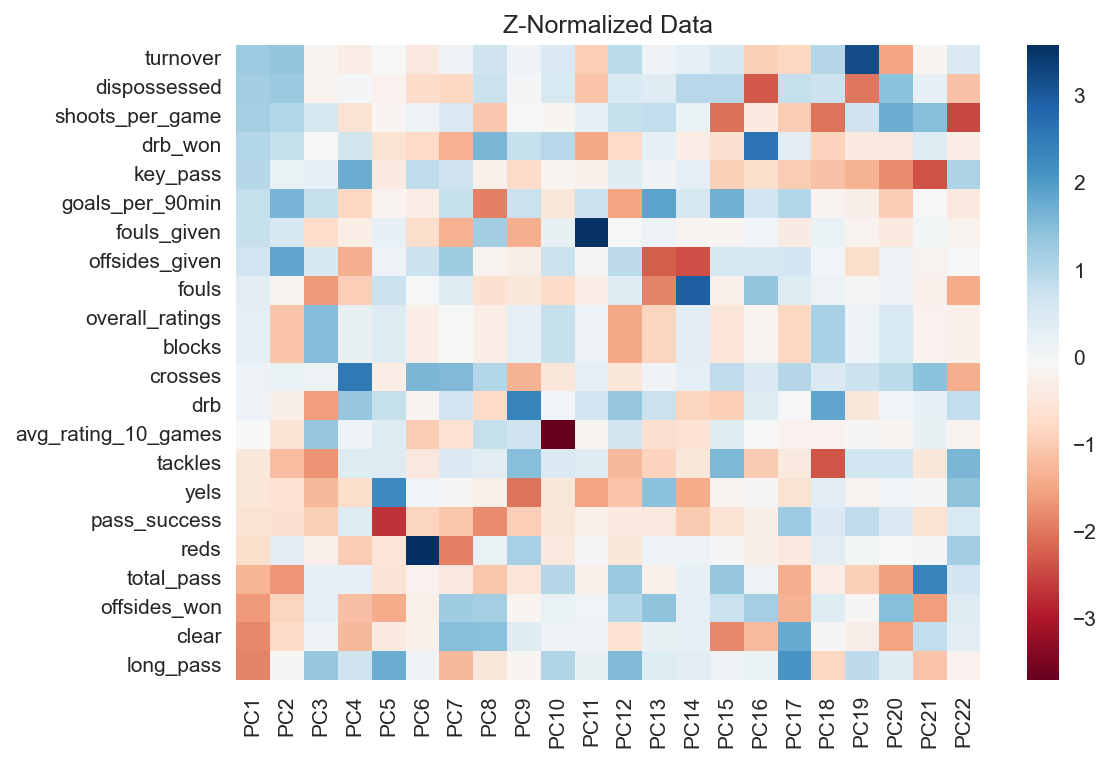

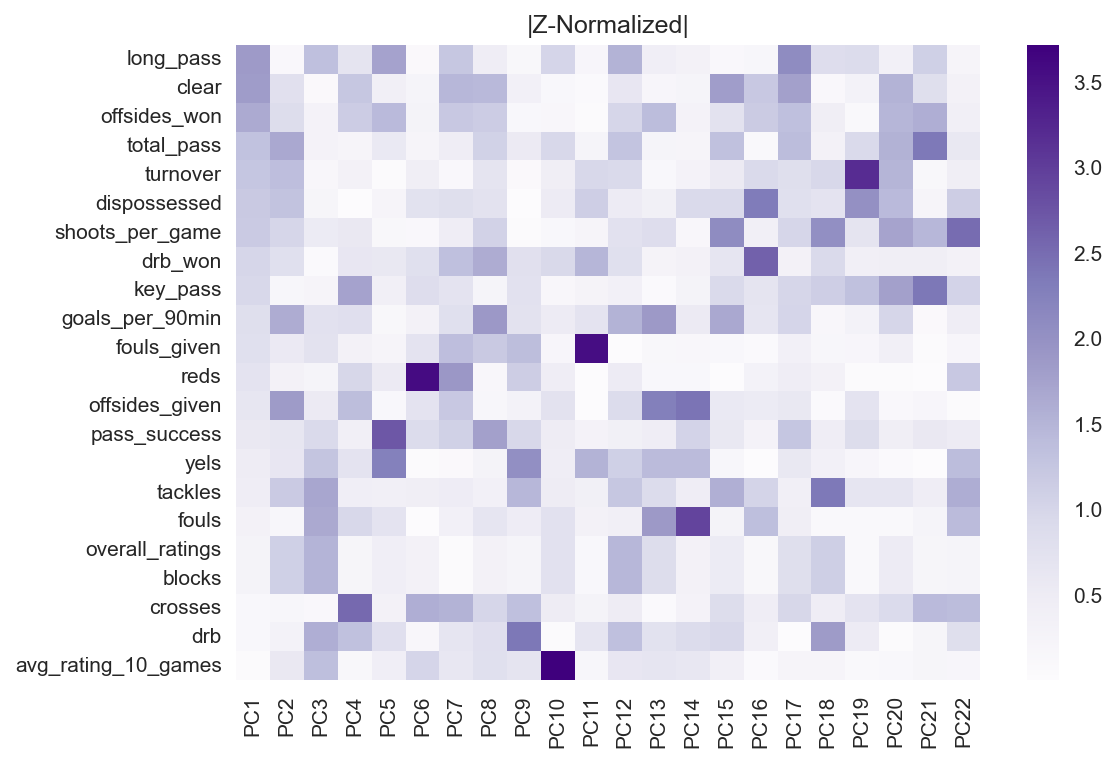

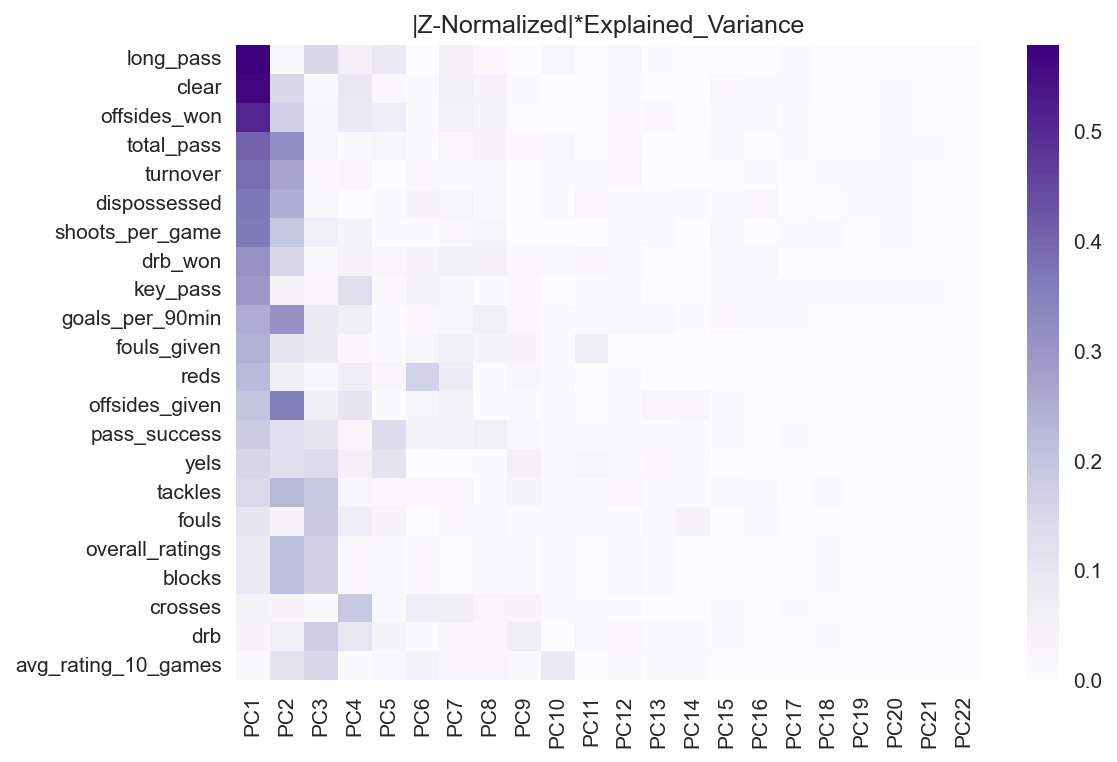

        score_             feature_
rank                               
1     1.050641            long_pass
2     1.046963         offsides_won
3     1.032663                clear
4     0.974859           total_pass
5     0.952570      goals_per_90min
6     0.929718       offsides_given
7     0.850611         dispossessed
8     0.836004             turnover
9     0.813744              drb_won
10    0.809542      shoots_per_game
11    0.805937         pass_success
12    0.799480              tackles
13    0.749911                 yels
14    0.717306                 reds
15    0.708451          fouls_given
16    0.665263             key_pass
17    0.616658                  drb
18    0.614167      overall_ratings
19    0.614167               blocks
20    0.590421                fouls
21    0.555470              crosses
22    0.551533  avg_rating_10_games


(           variance_cumulative      variance
 dimension                                   
 1                     0.308943  3.089427e-01
 2                     0.501619  1.926763e-01
 3                     0.613241  1.116223e-01
 4                     0.688349  7.510789e-02
 5                     0.738337  4.998748e-02
 6                     0.783334  4.499698e-02
 7                     0.823598  4.026435e-02
 8                     0.855216  3.161822e-02
 9                     0.881032  2.581560e-02
 10                    0.904039  2.300663e-02
 11                    0.921822  1.778377e-02
 12                    0.936963  1.514113e-02
 13                    0.950183  1.321952e-02
 14                    0.962483  1.229977e-02
 15                    0.970710  8.227335e-03
 16                    0.978912  8.201923e-03
 17                    0.984396  5.483985e-03
 18                    0.989279  4.883202e-03
 19                    0.993490  4.210513e-03
 20                    0.997186  3

In [48]:
from pca_analyzer import *

pca_full_report(X=scaled_X, features_=features)

In [49]:
# To visualize, perform PCA to get 2 dementional dataset
from sklearn.decomposition import PCA 
pca_players = PCA(n_components=2)
principalComponents_players = pca_players.fit_transform(scaled_X)
pca_columns =  ['PCA 1', 'PCA 2']

pca_df = pd.DataFrame(data = principalComponents_players, columns = pca_columns)
pca_df.reset_index(inplace=True)

final_df = pd.merge(df, pca_df, on='index')
final_df

player_name Current Team  overall_ratings  avg_rating_10_games   
0          Aaron Hickey    Brentford         6.450000                6.276  \
1        Aaron Ramsdale      Arsenal         6.610000                6.553   
2    Abdoulaye Doucouré      Everton         6.643333                6.701   
3          Adam Forshaw        Leeds         6.260000                6.253   
4            Adam Smith  Bournemouth         6.320000                6.371   
..                  ...          ...              ...                  ...   
279         Yoane Wissa    Brentford         6.515000                6.497   
280     Youri Tielemans    Leicester         6.920000                6.518   
281               Zanka    Brentford         6.400000                6.457   
282         _lex Moreno  Aston Villa         6.710000                6.740   
283       _douard Mendy      Chelsea         6.533333                6.318   

     goals_per_90min       yels      reds  shoots_per_game  pass_success   
0           0.000000   7.000000  0.000000         0.400000     84.700000  \
1           0.000000   1.000000  0.000000         0.000000     56.433333   
2           0.131502   6.000000  0.333333         0.833333     81.700000   
3           0.000000   2.500000  0.000000         0.300000     83.250000   
4           0.000000  10.000000  0.000000         0.100000     75.100000   
..               ...        ...       ...              ...           ...   
279         0.455392   1.000000  0.000000         1.000000     70.650000   
280         0.161746   4.333333  0.000000         1.366667     82.333333   
281         0.087041   1.500000  0.000000         0.250000     80.450000   
282         0.000000   3.000000  0.000000         0.700000     79.400000   
283         0.000000   2.000000  0.000000         0.000000     80.733333   

      tackles  ...  cluster 2  cluster 3  cluster 4  cluster 5  cluster 6   
0    1.500000  ...          0          1          0          0          0  \
1    0.033333  ...          1          0          0          0          0   
2    1.866667  ...          0          0          0          1          0   
3    1.650000  ...          0          1          0          0          0   
4    1.300000  ...          0          1          0          0          0   
..        ...  ...        ...        ...        ...        ...        ...   
279  0.400000  ...          0          0          0          0          0   
280  2.266667  ...          0          0          0          1          0   
281  1.100000  ...          0          1          0          0          0   
282  1.200000  ...          0          0          0          0          1   
283  0.000000  ...          1          0          0          0          0   

     cluster 7   x   y     PCA 1     PCA 2  
0            0  30  20 -1.140836  0.071478  
1            0  10  40 -3.990777  2.327718  
2            0  40  40  0.519523 -0.769397  
3            0  40  40 -1.400645  1.164715  
4            0  30  60 -2.028390  0.037627  
..         ...  ..  ..       ...       ...  
279          0  90  20  0.515297  3.450546  
280          0  40  40  1.883348 -2.532412  
281          0  30  40 -2.613631  1.075679  
282          0  30  20  1.226362 -1.063200  
283          0  10  40 -3.867498  2.121051  

[284 rows x 42 columns]

In [51]:
import altair as alt

alt.Chart(final_df).mark_circle(size=60).encode(
    x='PCA 1',
    y='PCA 2',
    color='cluster:N',
    tooltip=['player_name', 'cluster', 'Current Team', 'PCA 1', 'PCA 2']
).properties(
    width=800,
    height=800
).interactive()

alt.Chart(...)

In [52]:
final_df.to_csv(f'../datasets/labeled_after_clustering/kmeans/final_result_player.csv')

In [206]:
# to visualize PCA and feature correlations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import cnames
from itertools import cycle
from bokeh.plotting import output_notebook, output_file, figure, show, ColumnDataSource
from bokeh.models import HoverTool
import warnings
warnings.filterwarnings(action='ignore')
output_notebook()
%matplotlib inline


Loading BokehJS ...

In [ ]:
### End of analysis ----------------------------------------------

In [207]:
from pca_analyzer import *


*--- PCA Report ---*

X mean:		-0.000
X variance:	1.000
...Assuming data is properly scaled...

 -- Summary --
You can reduce from 22 to 13 dimensions while retaining 95% of variance.
2 principal components explain 50.20% of variance.
3 principal components explain 61.30% of variance.


X*X_pca: (22, 284) * (284, 22) = (22, 22)


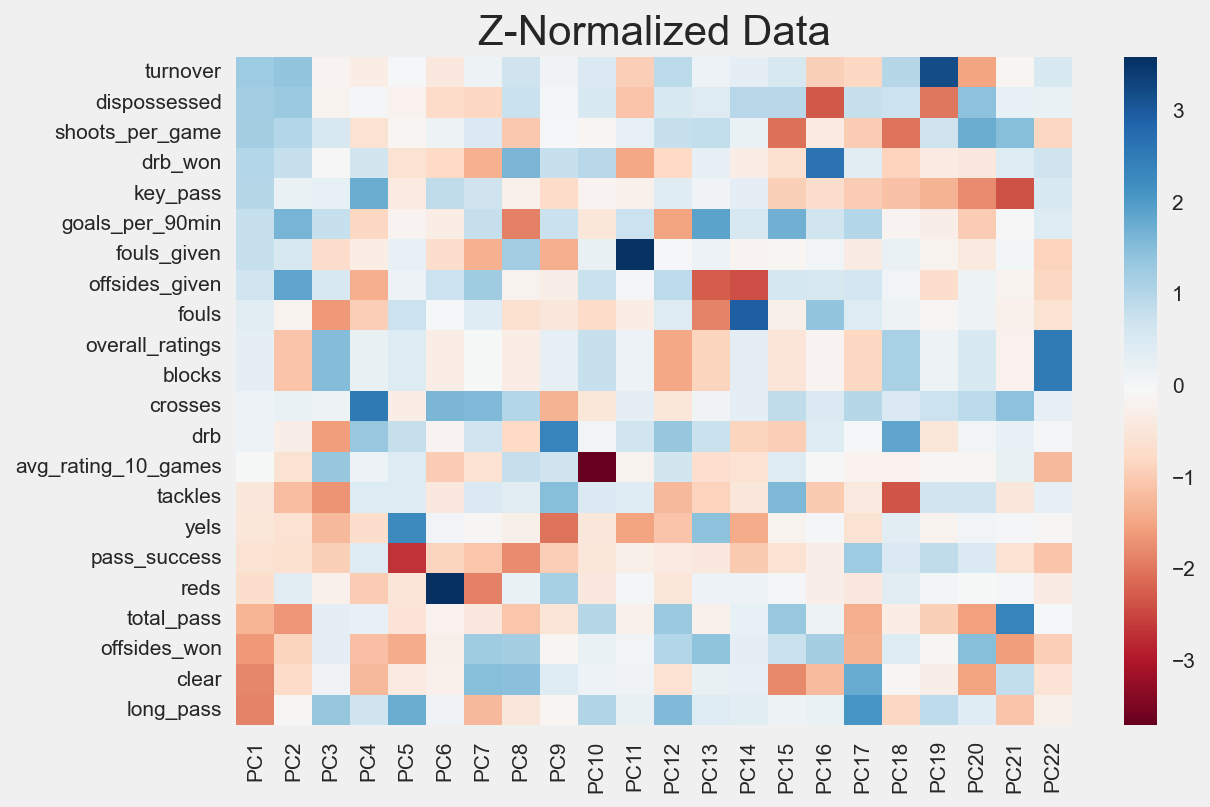

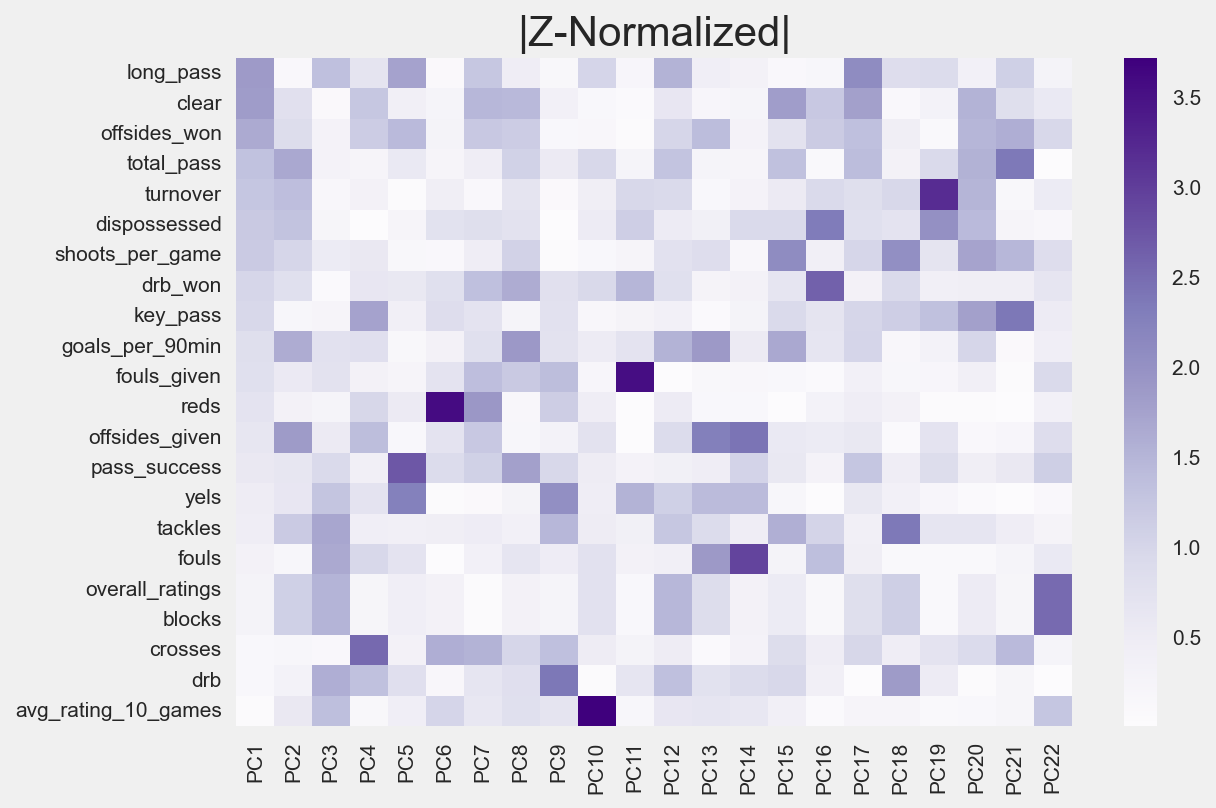

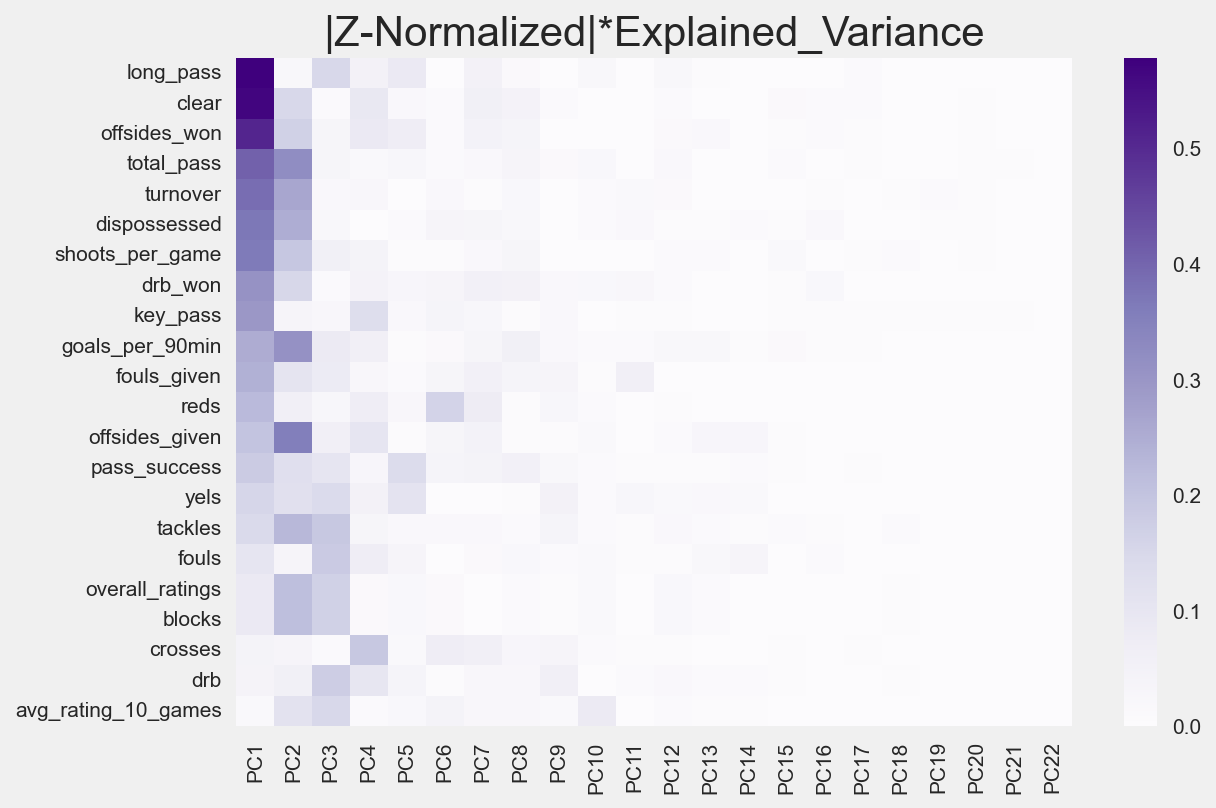

        score_             feature_
rank                               
1     1.050641            long_pass
2     1.046963         offsides_won
3     1.032663                clear
4     0.974859           total_pass
5     0.952570      goals_per_90min
6     0.929718       offsides_given
7     0.850611         dispossessed
8     0.836004             turnover
9     0.813744              drb_won
10    0.809542      shoots_per_game
11    0.805937         pass_success
12    0.799480              tackles
13    0.749911                 yels
14    0.717306                 reds
15    0.708451          fouls_given
16    0.665263             key_pass
17    0.616658                  drb
18    0.614167      overall_ratings
19    0.614167               blocks
20    0.590421                fouls
21    0.555470              crosses
22    0.551533  avg_rating_10_games


(           variance_cumulative      variance
 dimension                                   
 1                     0.308943  3.089427e-01
 2                     0.501619  1.926763e-01
 3                     0.613241  1.116223e-01
 4                     0.688349  7.510789e-02
 5                     0.738337  4.998748e-02
 6                     0.783334  4.499698e-02
 7                     0.823598  4.026435e-02
 8                     0.855216  3.161822e-02
 9                     0.881032  2.581560e-02
 10                    0.904039  2.300663e-02
 11                    0.921822  1.778377e-02
 12                    0.936963  1.514113e-02
 13                    0.950183  1.321952e-02
 14                    0.962483  1.229977e-02
 15                    0.970710  8.227335e-03
 16                    0.978912  8.201923e-03
 17                    0.984396  5.483985e-03
 18                    0.989279  4.883202e-03
 19                    0.993490  4.210513e-03
 20                    0.997186  3

In [208]:
pca_full_report(X=scaled_X, features_=features)


In [35]:
# Ratings, which are very important in reality, seem to be underestimated in PCA
# while Age and Height are overestimated.
# Re-run PCA without "Height" and "age"
# Choose 8 principal component
features = ['overall_ratings', 'avg_rating_10_games', 'mins', 'goals', 'yels', 'reds',
       'shoots_per_game', 'pass_success', 'tackles',
       'fouls', 'offsides_won', 'clear', 'drb', 'blocks', 'key_pass',
       'drb_won', 'fouls_given', 'offsides_given', 'dispossessed', 'turnover',
       'total_pass', 'crosses', 'long_pass']

X = np.array(df[features])
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X


from sklearn.decomposition import PCA 
pca_players = PCA(n_components=8)
principalComponents_players = pca_players.fit_transform(scaled_X)
pca_columns =  ['PCA 1', 'PCA 2', 'PCA 3', 'PCA 4', 'PCA 5', 'PCA 6', 'PCA 7', 'PCA 8']

pca_df = pd.DataFrame(data = principalComponents_players, columns = pca_columns)
pca_df.reset_index(inplace=True)

final_df = pd.merge(df, pca_df, on='index')
final_df

Name Current Team  overall_ratings  avg_rating_10_games   
0          Aaron Hickey    Brentford         6.450000                6.276  \
1        Aaron Ramsdale      Arsenal         6.610000                6.553   
2    Abdoulaye Doucouré      Everton         6.643333                6.701   
3          Adam Forshaw        Leeds         6.260000                6.253   
4            Adam Smith  Bournemouth         6.320000                6.371   
..                  ...          ...              ...                  ...   
279         Yoane Wissa    Brentford         6.515000                6.497   
280     Youri Tielemans    Leicester         6.920000                6.518   
281               Zanka    Brentford         6.400000                6.457   
282         Álex Moreno  Aston Villa         6.710000                6.740   
283       Édouard Mendy      Chelsea         6.533333                6.318   

            mins     goals       yels      reds  shoots_per_game   
0    1861.000000  0.000000   7.000000  0.000000         0.400000  \
1    3270.000000  0.000000   1.000000  0.000000         0.000000   
2    2143.000000  2.666667   6.000000  0.333333         0.833333   
3     959.000000  0.000000   2.500000  0.000000         0.300000   
4    2867.000000  0.000000  10.000000  0.000000         0.100000   
..           ...       ...        ...       ...              ...   
279  1393.500000  7.000000   1.000000  0.000000         1.000000   
280  2751.000000  5.000000   4.333333  0.000000         1.366667   
281   762.500000  0.500000   1.500000  0.000000         0.250000   
282  1336.000000  0.000000   3.000000  0.000000         0.700000   
283  2220.333333  0.000000   2.000000  0.000000         0.000000   

     pass_success  ...   age  index     PCA 1     PCA 2     PCA 3     PCA 4   
0       84.700000  ...  20.0      0 -1.149214  0.213238 -2.081091 -0.582364  \
1       56.433333  ...  25.0      1 -3.921249  1.142563  3.626632  0.468050   
2       81.700000  ...  30.0      2  0.563113 -0.705680 -1.456909 -0.512361   
3       83.250000  ...  31.0      3 -1.541740  1.643881 -2.532807  0.800955   
4       75.100000  ...  32.0      4 -1.952155 -0.290102 -1.941359 -0.454380   
..            ...  ...   ...    ...       ...       ...       ...       ...   
279     70.650000  ...  26.0    279  0.114899  3.181199  1.329448 -0.797495   
280     82.333333  ...  26.0    280  2.192587 -2.503686 -1.155290  1.205258   
281     80.450000  ...  33.0    281 -2.833495  1.289701 -0.904727  0.183037   
282     79.400000  ...  29.0    282  1.227127 -0.519175 -1.200931  1.599953   
283     80.733333  ...  31.0    283 -3.887277  1.509133  1.809216  0.688047   

        PCA 5     PCA 6     PCA 7     PCA 8  
0    0.635510 -0.578033 -0.740320 -0.151944  
1    2.335048 -0.097415 -0.466236  0.468987  
2    0.862276  0.649231 -0.482950 -0.534252  
3    0.164439 -0.139088  0.021628 -0.602665  
4    2.849619  0.177294  0.764440 -0.087156  
..        ...       ...       ...       ...  
279 -0.234975 -0.115265  0.637575 -0.419515  
280  1.274290 -0.365510 -0.036652 -1.110495  
281 -0.732015 -0.087175  0.683375 -0.548998  
282 -0.745024  0.000579  0.882570  1.217550  
283  0.506253 -0.109641 -0.990977 -1.173498  

[284 rows x 36 columns]

In [48]:
# To cluster, we use 10 columns (overall_ratings, avg_rating_10_games, pca 1~8)
features = ['PCA 1','PCA 2','PCA 3','PCA 4','PCA 5','PCA 6','PCA 7','PCA 8']
X = np.array(final_df[features])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-4.37999569e-01,  1.00854415e-01, -1.28466403e+00, ...,
        -5.79876962e-01, -7.83761421e-01, -1.82106612e-01],
       [-1.49450457e+00,  5.40393256e-01,  2.23873123e+00, ...,
        -9.77258673e-02, -4.93593957e-01,  5.62085703e-01],
       [ 2.14619202e-01, -3.33762453e-01, -8.99354205e-01, ...,
         6.51302562e-01, -5.11288825e-01, -6.40306101e-01],
       ...,
       [-1.07992930e+00,  6.09984655e-01, -5.58490445e-01, ...,
        -8.74527700e-02,  7.23474353e-01, -6.57980077e-01],
       [ 4.67694740e-01, -2.45551902e-01, -7.41338208e-01, ...,
         5.80618532e-04,  9.34358253e-01,  1.45924608e+00],
       [-1.48155686e+00,  7.13768465e-01,  1.11683468e+00, ...,
        -1.09990547e-01, -1.04912671e+00, -1.40644990e+00]])

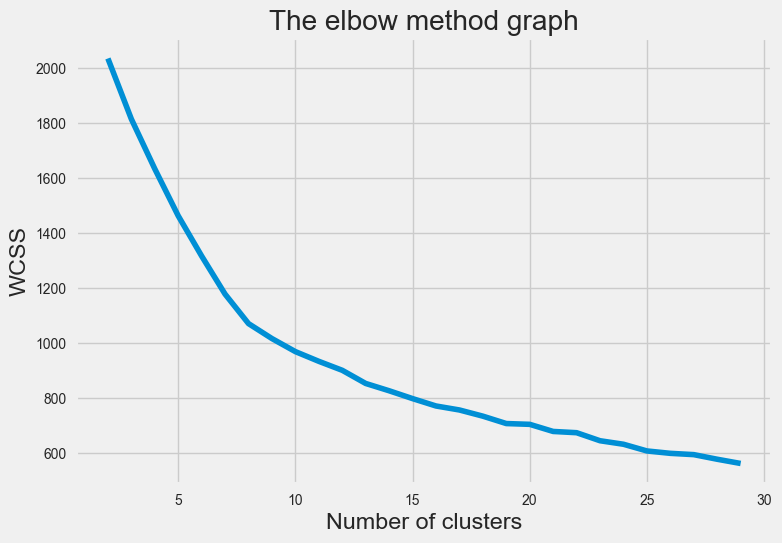

In [49]:
# find out the optimal number of clusters by within-cluster-sum of squared errors
wcss = []

for i in range(2,30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)

plt.style.use("fivethirtyeight") 
plt.plot(range(2,30), wcss)
plt.title(f'The elbow method graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

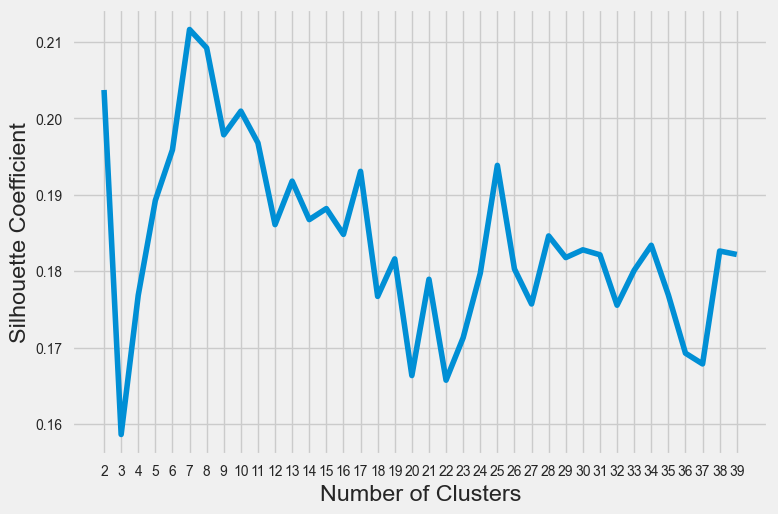

In [50]:
silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 40):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X)
    score = silhouette_score(scaled_X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 40), silhouette_coefficients)
plt.xticks(range(2, 40))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

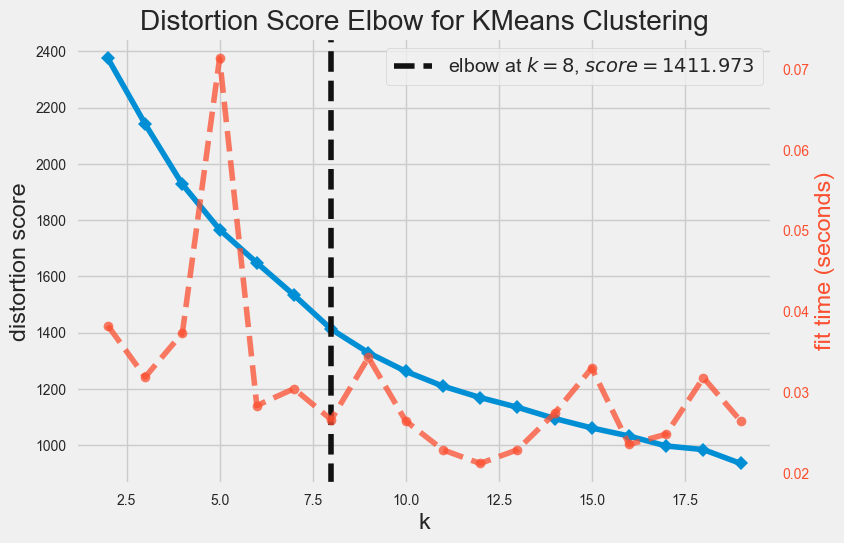

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20), timings=True)
visualizer.fit(scaled_X)
visualizer.show()

In [51]:
OPTIMAL_N_CLUSTERS = 7

kmeans = KMeans(n_clusters=OPTIMAL_N_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=42)

final_df['cluster'] = kmeans.fit_predict(scaled_X)


In [52]:
# visualize using altair
import altair as alt

alt.Chart(final_df).mark_circle(size=60).encode(
    x='PCA 1',
    y='PCA 2',
    color='cluster:N',
    tooltip=['Name', 'cluster', 'Current Team', 'PCA 1', 'PCA 2']
).properties(
    width=800,
    height=800
).interactive()

alt.Chart(...)

In [87]:
# export csv file
final_df.to_csv(f'../datasets/labeled_after_clustering/kmeans/player_stats_with_label.csv')

In [93]:
# just to check the columns
final_df.columns


Index(['Name', 'Current Team', 'overall_ratings', 'avg_rating_10_games',
       'mins', 'goals', 'yels', 'reds', 'shoots_per_game', 'pass_success',
       'tackles', 'fouls', 'offsides_won', 'clear', 'drb', 'blocks',
       'key_pass', 'drb_won', 'fouls_given', 'offsides_given', 'dispossessed',
       'turnover', 'total_pass', 'crosses', 'long_pass', 'Height', 'age',
       'index', 'cluster', 'PCA 1', 'PCA 2'],
      dtype='object')

In [95]:
final_df

Name Current Team  overall_ratings  avg_rating_10_games   
0          Aaron Hickey    Brentford         6.450000                6.276  \
1        Aaron Ramsdale      Arsenal         6.610000                6.553   
2    Abdoulaye Doucouré      Everton         6.643333                6.701   
3          Adam Forshaw        Leeds         6.260000                6.253   
4            Adam Smith  Bournemouth         6.320000                6.371   
..                  ...          ...              ...                  ...   
279         Yoane Wissa    Brentford         6.515000                6.497   
280     Youri Tielemans    Leicester         6.920000                6.518   
281               Zanka    Brentford         6.400000                6.457   
282         Álex Moreno  Aston Villa         6.710000                6.740   
283       Édouard Mendy      Chelsea         6.533333                6.318   

            mins     goals       yels      reds  shoots_per_game   
0    1861.000000  0.000000   7.000000  0.000000         0.400000  \
1    3270.000000  0.000000   1.000000  0.000000         0.000000   
2    2143.000000  2.666667   6.000000  0.333333         0.833333   
3     959.000000  0.000000   2.500000  0.000000         0.300000   
4    2867.000000  0.000000  10.000000  0.000000         0.100000   
..           ...       ...        ...       ...              ...   
279  1393.500000  7.000000   1.000000  0.000000         1.000000   
280  2751.000000  5.000000   4.333333  0.000000         1.366667   
281   762.500000  0.500000   1.500000  0.000000         0.250000   
282  1336.000000  0.000000   3.000000  0.000000         0.700000   
283  2220.333333  0.000000   2.000000  0.000000         0.000000   

     pass_success  ...  turnover  total_pass   crosses  long_pass  Height   
0       84.700000  ...  0.600000        28.4  0.200000   1.100000   178.0  \
1       56.433333  ...  0.033333        27.0  0.000000   5.233333   188.0   
2       81.700000  ...  1.200000        34.6  0.033333   0.800000   184.0   
3       83.250000  ...  0.800000        26.0  0.150000   1.600000   174.0   
4       75.100000  ...  0.600000        25.8  0.500000   1.600000   180.0   
..            ...  ...       ...         ...       ...        ...     ...   
279     70.650000  ...  1.100000         8.8  0.000000   0.200000   176.0   
280     82.333333  ...  1.200000        55.9  0.466667   2.500000   176.0   
281     80.450000  ...  0.100000        28.7  0.150000   1.300000   191.0   
282     79.400000  ...  2.000000        30.5  0.800000   0.500000   179.0   
283     80.733333  ...  0.033333        25.6  0.000000   3.733333   194.0   

      age  index  cluster     PCA 1     PCA 2  
0    20.0      0        0 -0.803671  0.526813  
1    25.0      1        5 -3.979549  1.201958  
2    30.0      2        0  0.437709 -0.766215  
3    31.0      3        2 -1.239768  1.916042  
4    32.0      4        0 -1.930282 -0.127259  
..    ...    ...      ...       ...       ...  
279  26.0    279        2  0.384739  3.197409  
280  26.0    280        0  2.274136 -2.447240  
281  33.0    281        2 -3.061119  1.267395  
282  29.0    282        0  1.277538 -0.495402  
283  31.0    283        5 -4.170875  1.450583  

[284 rows x 31 columns]

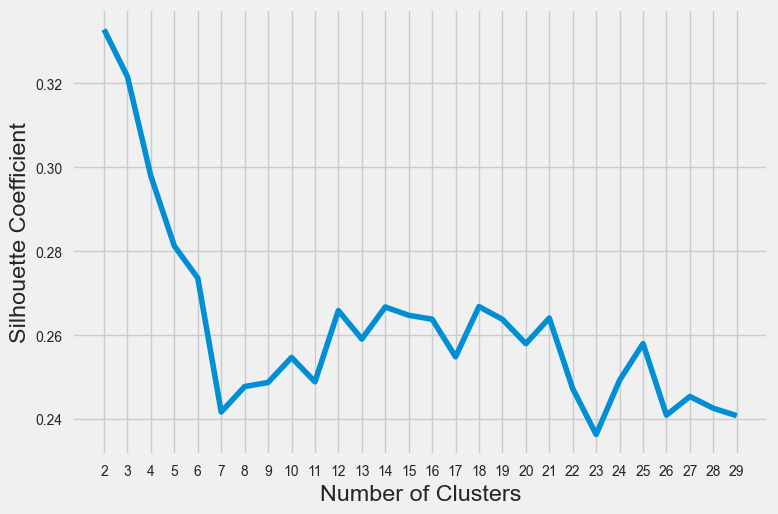

In [99]:
# different features
features_tuned = ['overall_ratings', 'avg_rating_10_games', 'PCA 1', 'PCA 2']

X = np.array(final_df[features_tuned])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

from sklearn.metrics import silhouette_score

silhouette_coefficients = []
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X)
    score = silhouette_score(scaled_X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/1108232/PycharmProjects/Milestone2/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

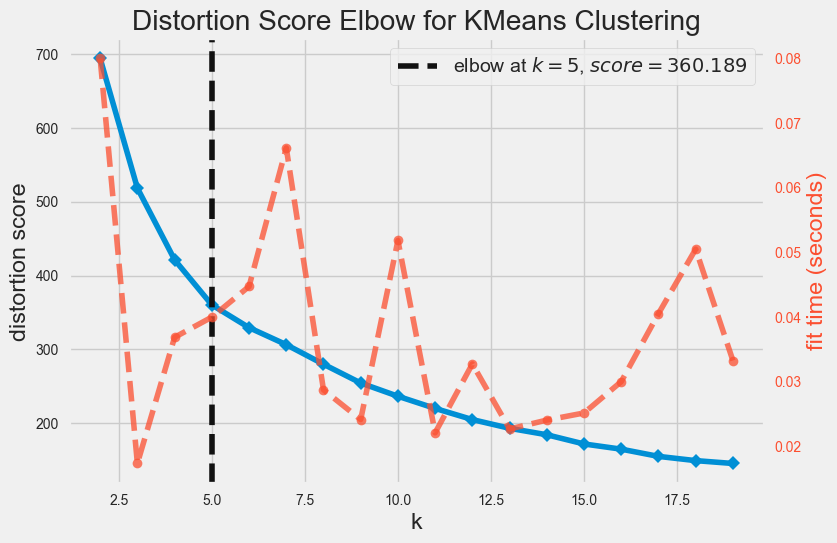

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20), timings=True)
visualizer.fit(scaled_X)
visualizer.show()

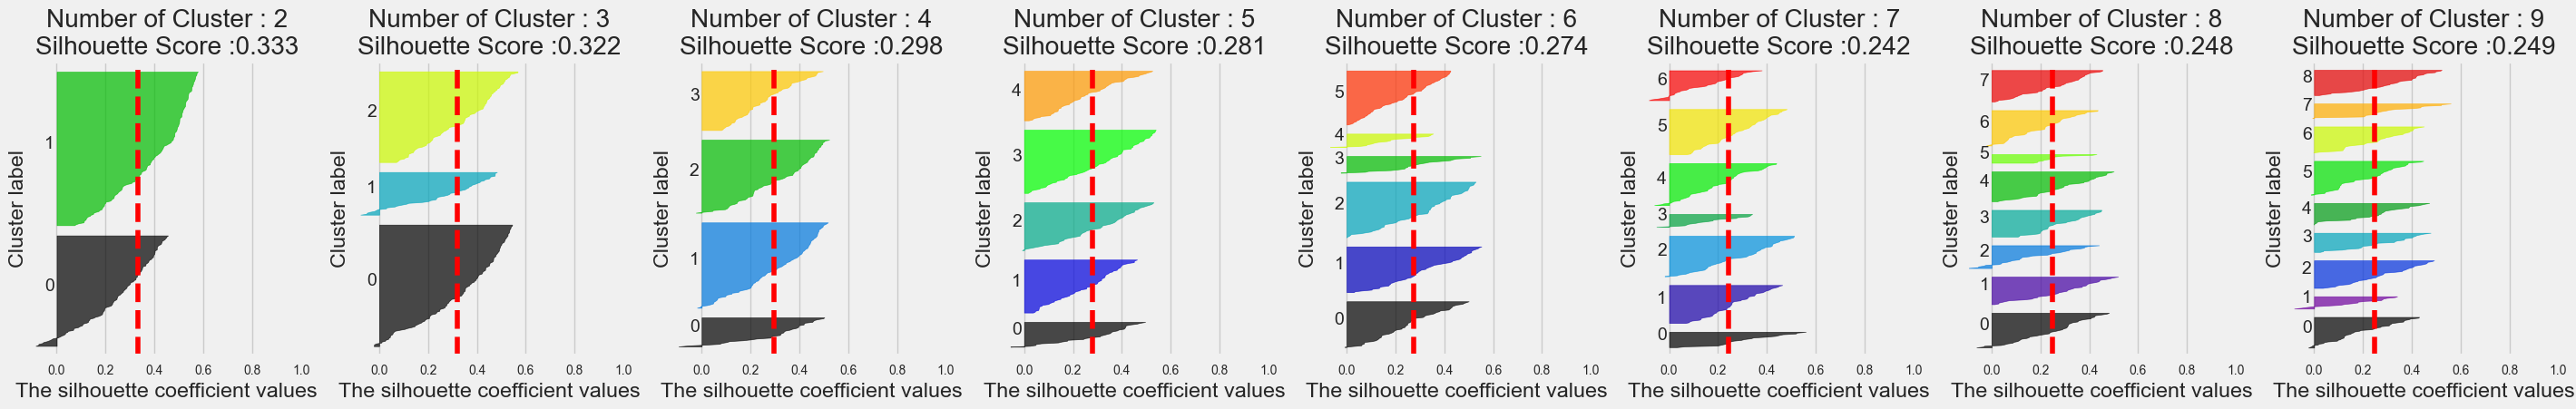

In [98]:
visualize_silhouette(range(2,10), scaled_X)

In [100]:
OPTIMAL_N_CLUSTERS = 18

kmeans = KMeans(n_clusters=OPTIMAL_N_CLUSTERS, init='k-means++', max_iter=300, n_init=10, random_state=42)

final_df['cluster'] = kmeans.fit_predict(scaled_X)

In [102]:
# import altair as alt

alt.Chart(final_df).mark_circle(size=60).encode(
    x='PCA 1',
    y='PCA 2',
    color='cluster:N',
    tooltip=['Name', 'cluster', 'Current Team', 'overall_ratings', 'PCA 1', 'PCA 2']
).properties(
    width=800,
    height=800
).interactive()

alt.Chart(...)

In [115]:
evr = pca_players.explained_variance_ratio_

In [116]:
cumsum = np.cumsum(evr)


In [117]:
cumsum

array([0.60521732, 0.85554617, 0.96481263, 1.        ])